In [1]:
#pip install --upgrade vnstock

In [2]:
import vnstock as vn
from datetime import datetime 
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
import pandas_ta as ta
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = vn.listing_companies()

In [4]:
df.head()

ticker comGroupCode                                          organName  \
0    SSI         HOSE                    Công ty Cổ phần Chứng khoán SSI   
1    BCM         HOSE  Tổng Công ty Đầu tư và Phát triển Công nghiệp ...   
2    VHM         HOSE                           Công ty Cổ phần Vinhomes   
3    VIC         HOSE                     Tập đoàn Vingroup - Công ty CP   
4    VRE         HOSE                      Công ty Cổ phần Vincom Retail   

    organShortName organTypeCode comTypeCode               icbName  \
0  Chứng khoán SSI            DN          CK  Môi giới chứng khoán   
1      Becamex IDC            DN          CT          Bất động sản   
2         Vinhomes            DN          CT          Bất động sản   
3         VinGroup            DN          CT          Bất động sản   
4    Vincom Retail            DN          CT          Bất động sản   

                                         icbNamePath     sector  \
0  Tài chính/Dịch vụ tài chính/Dịch vụ tài chính/...  Tài chính   
1   Tài chính/Bất động sản/Bất động sản/Bất động sản  Tài chính   
2   Tài chính/Bất động sản/Bất động sản/Bất động sản  Tài chính   
3   Tài chính/Bất động sản/Bất động sản/Bất động sản  Tài chính   
4   Tài chính/Bất động sản/Bất động sản/Bất động sản  Tài chính   

            industry              group              subgroup  icbCode  VN30  \
0  Dịch vụ tài chính  Dịch vụ tài chính  Môi giới chứng khoán     8777  True   
1       Bất động sản       Bất động sản          Bất động sản     8633  True   
2       Bất động sản       Bất động sản          Bất động sản     8633  True   
3       Bất động sản       Bất động sản          Bất động sản     8633  True   
4       Bất động sản       Bất động sản          Bất động sản     8633  True   

   VNMID  VN100  VNSML  VNALL  HNX30  VNX50  VNXALL  VNDIAMOND  VNFINLEAD  \
0  False   True  False   True  False   True    True      False       True   
1  False   True  False   True  False  False   False      False      False   
2  False   True  False   True  False   True    True      False      False   
3  False   True  False   True  False   True    True      False      False   
4  False   True  False   True  False   True    True      False      False   

   VNFINSELECT   VNSI  VNCOND  VNCONS  VNENE  VNFIN  VNHEAL  VNIND   VNIT  \
0         True  False   False   False  False   True   False  False  False   
1        False  False   False   False  False  False   False  False  False   
2        False  False   False   False  False  False   False  False  False   
3        False   True   False   False  False  False   False  False  False   
4        False  False   False   False  False  False   False  False  False   

   VNMAT  VNREAL  VNUTI  
0  False   False  False  
1  False    True  False  
2  False    True  False  
3  False    True  False  
4  False    True  False

In [5]:
unique_industries = df['industry'].unique()
unique_industries

array(['Dịch vụ tài chính', 'Bất động sản', 'Bảo hiểm',
       'Điện, nước & xăng dầu khí đốt', 'Ngân hàng', 'Tài nguyên Cơ bản',
       'Hóa chất', 'Thực phẩm và đồ uống', 'Du lịch và Giải trí',
       'Bán lẻ', 'Dầu khí', 'Công nghệ Thông tin', 'Viễn thông',
       'Ô tô và phụ tùng', 'Hàng cá nhân & Gia dụng', 'Truyền thông',
       'Y tế', 'Xây dựng và Vật liệu', 'Hàng & Dịch vụ Công nghiệp'],
      dtype=object)

In [6]:
financial_services_companies = df[df['industry'] == 'Dịch vụ tài chính']

unique_financial_icbNames = financial_services_companies['icbName'].unique()

unique_financial_icbNames

array(['Môi giới chứng khoán', 'Quỹ đầu tư', 'Tài chính đặc biệt',
       'Quản lý tài sản', 'Tài chính cá nhân'], dtype=object)

In [7]:
brokerage_companies = df[df['icbName'] == 'Môi giới chứng khoán']

unique_comGroupCodes = brokerage_companies['comGroupCode'].unique()

unique_comGroupCodes

array(['HOSE', 'UPCOM', 'HNX'], dtype=object)

In [8]:
#filtered_companies = df[(df['comGroupCode'].isin(['HOSE', 'HNX'])) & (df['icbName'] == 'Môi giới chứng khoán')]
filtered_companies = df[(df['icbName'] == 'Môi giới chứng khoán')]
filtered_companies

ticker comGroupCode                                          organName  \
0     SSI         HOSE                    Công ty Cổ phần Chứng khoán SSI   
55    ABW        UPCOM                Công ty Cổ phần Chứng khoán An Bình   
56    AGR         HOSE               Công ty Cổ phần Chứng khoán AGRIBANK   
57    APG         HOSE                    Công ty Cổ phần Chứng khoán APG   
58    APS          HNX  Công ty Cổ phần Chứng khoán Châu Á - Thái Bình...   
60    BMS        UPCOM               Công ty Cổ phần Chứng khoán Bảo Minh   
61    BSI         HOSE                   Công ty Cổ phần Chứng khoán BIDV   
62    BVS          HNX               Công ty Cổ phần Chứng khoán Bảo Việt   
64    CTS         HOSE  Công ty Cổ phần Chứng khoán Ngân hàng Công thư...   
65    DSC        UPCOM                    Công ty Cổ phần Chứng khoán DSC   
68    ART        UPCOM                    Công ty Cổ phần Chứng khoán BOS   
69    FTS         HOSE                    Công ty Cổ phần Chứng khoán FPT   
70    AAS        UPCOM            Công ty Cổ phần Chứng khoán SmartInvest   
71    HBS          HNX               Công ty Cổ phần Chứng khoán Hòa Bình   
72    HCM         HOSE  Công ty Cổ phần Chứng khoán Thành phố Hồ Chí Minh   
73    HAC        UPCOM              Công ty Cổ phần Chứng khoán Hải Phòng   
75    IVS          HNX  Công ty Cổ phần Chứng khoán Guotai Junan (Việt...   
76    EVS          HNX                Công ty Cổ phần Chứng khoán Everest   
78    ORS         HOSE             Công ty Cổ phần Chứng khoán Tiên Phong   
79    CSI        UPCOM    Công ty Cổ phần Chứng khoán Kiến thiết Việt Nam   
80    PHS        UPCOM               Công ty Cổ phần Chứng khoán Phú Hưng   
81    PSI          HNX                Công ty Cổ phần Chứng khoán Dầu khí   
82    SBS        UPCOM                    Công ty Cổ phần Chứng khoán SBS   
83    SHS          HNX       Công ty Cổ phần Chứng khoán Sài Gòn - Hà Nội   
84    TCI        UPCOM             Công ty Cổ phần Chứng khoán Thành Công   
85    MBS          HNX                     Công ty Cổ phần Chứng khoán MB   
86    TVB         HOSE               Công ty Cổ phần Chứng khoán Trí Việt   
88    TVS         HOSE             Công ty Cổ phần Chứng khoán Thiên Việt   
89    VCI         HOSE                Công ty Cổ phần Chứng khoán Vietcap   
90    VDS         HOSE              Công ty Cổ phần Chứng khoán Rồng Việt   
91    VFS          HNX              Công ty Cổ phần Chứng khoán Nhất Việt   
92    VUA        UPCOM       Công ty Cổ phần Chứng khoán Stanley Brothers   
93    VIG          HNX  Công ty Cổ phần Chứng khoán Đầu tư Tài chính V...   
94    VIX         HOSE                    Công ty Cổ phần Chứng khoán VIX   
95    VND         HOSE               Công ty Cổ phần Chứng khoán VNDIRECT   
96    WSS          HNX               Công ty Cổ phần Chứng khoán Phố Wall   

                           organShortName organTypeCode comTypeCode  \
0                         Chứng khoán SSI            DN          CK   
55                    Chứng khoán An Bình            DN          CK   
56                               Agriseco            DN          CK   
57                        Chứng khoán APG            DN          CK   
58                        CK Châu Á - TBD            DN          CK   
60                   Chứng khoán Bảo Minh            DN          CK   
61                       Chứng khoán BIDV            DN          CK   
62                   Chứng khoán Bảo Việt            DN          CK   
64                 Chứng khoán Vietinbank            DN          CK   
65                        Chứng khoán DSC            DN          CK   
68                        Chứng khoán BOS            DN          CK   
69                        Chứng khoán FPT            DN          CK   
70                Chứng khoán SmartInvest            DN          CK   
71                   Chứng khoán Hòa Bình            DN          CK   
72                        Chứng khoán HSC            DN          CK   
73               

In [9]:
stocklist = filtered_companies.ticker
stockname = filtered_companies.organShortName

In [10]:
stock_list = stocklist.tolist()
print(stock_list)
print(len(stock_list))
stock_string = ', '.join(stock_list)
print(stock_string)


['SSI', 'ABW', 'AGR', 'APG', 'APS', 'BMS', 'BSI', 'BVS', 'CTS', 'DSC', 'ART', 'FTS', 'AAS', 'HBS', 'HCM', 'HAC', 'IVS', 'EVS', 'ORS', 'CSI', 'PHS', 'PSI', 'SBS', 'SHS', 'TCI', 'MBS', 'TVB', 'TVS', 'VCI', 'VDS', 'VFS', 'VUA', 'VIG', 'VIX', 'VND', 'WSS']
36
SSI, ABW, AGR, APG, APS, BMS, BSI, BVS, CTS, DSC, ART, FTS, AAS, HBS, HCM, HAC, IVS, EVS, ORS, CSI, PHS, PSI, SBS, SHS, TCI, MBS, TVB, TVS, VCI, VDS, VFS, VUA, VIG, VIX, VND, WSS


In [11]:
compare_data = vn.stock_ls_analysis(stock_string).T.reset_index()
compare_data

Mã CP Vốn hóa (tỷ)    Giá Số phiên tăng/giảm liên tiếp    P/E  P/B  \
0    ABW         1065  10533                           -4   25.1  0.8   
1    APS          540   6500                            0   -5.5  0.5   
2    ART          126   1300                            0    3.7  0.1   
3    BSI         7889  39000                            1   30.8  1.7   
4    CSI          667  39732                           -7  207.1  3.6   
5    CTS         3896  26200                            1   40.1  2.0   
6    DSC         3699  18058                           -2   46.7  3.3   
7    EVS         1434   8700                            1  -15.8  0.8   
8    FTS         9323  43450                            1   37.3  2.7   
9    HBS          264   8000                            0   20.2  0.6   
10   IVS          707  10200                            1   34.2  1.0   
11   MBS         9628  22000                            1   22.0  2.0   
12   ORS         3490  17450                            1   20.8  1.4   
13   PHS         2100  14000                            0   40.4  1.3   
14   SHS        14068  17300                            1   34.1  1.4   
15   TVB          555   4950                           -2  -36.1  0.6   
16   TVS         3458  22850                            1   15.0  1.8   
17   VFS         2448  20400                            0   34.3  2.4   
18   VIX        10142  15150                            1   18.1  1.2   
19   VND        25453  20900                            1   44.8  1.7   

   EV/EBITDA Cổ tức    ROE    ROA Thanh toán hiện hành Thanh toán nhanh  \
0       18.8    0.0  0.033   0.02                  1.8              1.8   
1       -3.2    0.0 -0.092  -0.09                 88.8             88.8   
2        3.4    0.0   0.03  0.029                 81.0             81.0   
3       23.6  0.032  0.082  0.037                  2.2              2.2   
4       73.6    0.0  0.018  0.017                165.6            165.6   
5       19.8    0.0  0.051  0.015                  1.4              1.4   
6       25.8    0.0  0.073  0.025                  1.3              1.3   
7      -17.6    0.0 -0.047 -0.036                  5.8              5.8   
8       29.6    0.0  0.075   0.04                  2.2              2.2   
9       17.3    0.0  0.032  0.032                123.8            123.8   
10      32.1    0.0  0.028  0.027                 13.0             13.0   
11      16.6    0.0  0.104   0.04                  1.7              1.7   
12       3.3    0.0  0.072  0.022                  2.4              2.4   
13      17.7  0.014  0.032  0.012                  1.7              1.7   
14      23.7    0.0  0.043  0.038                 12.3             12.3   
15     -19.3    0.0 -0.014 -0.013                113.9            113.9   
16       8.3    0.0  0.124  0.022                  0.8              0.8   
17      30.1    0.0  0.071   0.07                 56.0             56.0   
18      14.8    0.0  0.067  0.066                252.5            252.5   
19      19.5    0.0  0.038  0.013                  1.5              1.5   

   Biên LNG Nợ/Vốn CSH Nợ/EBITDA Doanh thu quý gần nhất   RSI    RS  
0     0.672        0.6       6.9                   0.04  23.2   8.0  
1     0.106        0.0       0.0                  0.839  29.9   3.0  
2     0.845        0.0       0.0                  1.925   0.0  34.0  
3     0.708        0.7       6.6                  0.102  51.4  92.0  
4     0.171        0.0       0.0                 -0.296  10.9   4.0  
5     0.563        2.4       9.9                  0.903  41.4  60.0  
6     0.784        2.0       8.4                  0.877  31.1  11.0  
7     0.549        0.1      -2.3                  0.029  33.5  21.0  
8     0.708        0.4       3.7                  0.462  57.3  94.0  
9     0.909        0.0       0.0                  3.533  31.3  11.0  
10    0.885        0.1       1.2                  0.976  37.8  66.0  
11    0.743        1.2       6.7                  0.1

We can see that in the list of securities companies, there are a total of 36 companies, but in the 'compare_data' list, there are only 19 companies.

The reason is that, according to the 'vnstock' package, missing data will be omitted.

In [12]:
vn.industry_analysis("VCI").T.reset_index()

Mã CP Vốn hóa (tỷ)    Giá Số phiên tăng/giảm liên tiếp   P/E    PEG  P/B  \
0    VCI        17063  39000                            1  50.0   -0.6  2.3   
1    SSI        49397  32950                            1  30.2   -0.8  2.3   
2    VND        25453  20900                            1  44.8   -0.6  1.7   
3    SHS        14068  17300                            1  34.1   -0.8  1.4   
4    HCM        13648  29850                            1  23.9   -0.5  1.7   
5    VIX        10142  15150                            1  18.1   -1.5  1.2   
6    MBS         9628  22000                            1  22.0   -0.6  2.0   
7    FTS         9323  43450                            1  37.3   -0.6  2.7   
8    BSI         7889  39000                            1  30.8 -218.6  1.7   
9    CTS         3896  26200                            1  40.1   -0.6  2.0   
10   DSC         3699  18058                           -2  46.7    0.4  3.3   
11   ORS         3490  17450                            1  20.8    2.9  1.4   
12   AGR         3468  16100                            1  21.7  -48.5  1.4   
13   TVS         3458  22850                            1  15.0   -2.6  1.8   
14   VDS         3161  15050                            1  15.3    0.0  1.4   
15   PHS         2100  14000                            0  40.4   -0.7  1.3   
16   AAS         1850   9251                           -1  10.7   -0.2  1.2   
17   EVS         1434   8700                            1 -15.8    0.1  0.8   
18   APG         1392   9060                            1 -13.9    0.1  0.9   
19   SBS         1135   7745                           -1 -15.5    0.0  3.3   

   EV/EBITDA Cổ tức    ROE    ROA Thanh toán hiện hành Thanh toán nhanh  \
0       18.8    0.0  0.047  0.022                  2.2              2.2   
1       20.6  0.059  0.091  0.035                  1.7              1.7   
2       19.5    0.0  0.038  0.013                  1.5              1.5   
3       23.7    0.0  0.043  0.038                 12.3             12.3   
4       22.3  0.039  0.073  0.034                  2.2              2.2   
5       14.8    0.0  0.067  0.066                252.5            252.5   
6       16.6    0.0  0.104   0.04                  1.7              1.7   
7       29.6    0.0  0.075   0.04                  2.2              2.2   
8       23.6  0.032  0.082  0.037                  2.2              2.2   
9       19.8    0.0  0.051  0.015                  1.4              1.4   
10      25.8    0.0  0.073  0.025                  1.3              1.3   
11       3.3    0.0  0.072  0.022                  2.4              2.4   
12      18.3  0.083  0.065  0.057                  4.7              4.7   
13       8.3    0.0  0.124  0.022                  0.8              0.8   
14      16.2    0.0  0.113  0.048                  2.0              2.0   
15      17.7  0.014  0.032  0.012                  1.7              1.7   
16      12.2    0.0  0.115  0.084                  3.8              3.8   
17     -17.6    0.0 -0.047 -0.036                  5.8              5.8   
18     -13.1    0.0 -0.059 -0.055                 15.2             15.2   
19     -20.6    0.0 -0.261 -0.102                  1.8              1.8   

   Biên LNG Biên LNST Nợ/Vốn CSH Nợ/EBITDA LNST 5 năm Doanh thu 5 năm  \
0     0.719     0.233        0.8       5.7      0.058           0.155   
1     0.725     0.335        1.1       7.0      0.079           0.169   
2     0.644     0.267        1.5       9.4      0.205           0.411   
3     0.672     0.457        0.1       0.7     -0.152           0.072   
4     0.478     0.268        0.8      10.9       0.09           0.205   
5     1.029     0.822        0.0       0.0      0.318           0.251   
6     0.743     0.308        1.2       6.7      0.846           0.185   
7     0.708     0.539        0.4       3.7      0.122           0.219   
8     0.708     0.391        0.7       6.6     -0.085           0.139   
9     0.563     0.202        2.4     

In [13]:
vonnhoa_list = []
p_e_list = []
p_b_list = []
for stock_code in stock_list:
   
    d = vn.industry_analysis(stock_code).T.reset_index()
    vonnhoa = d[(d["Mã CP"] == stock_code)]["Vốn hóa (tỷ)"].values[0]
    p_e = d[(d["Mã CP"] == stock_code)]["P/E"].values[0]
    p_b = d[(d["Mã CP"] == stock_code)]["P/B"].values[0]
  
    vonnhoa_list.append(vonnhoa)
    p_e_list.append(p_e) 
    p_b_list.append(p_b)

In [14]:
dfr = pd.DataFrame({'Mã CP': stock_list, 
                    'Vốn hóa (tỷ)': vonnhoa_list, 
                    'P/E': p_e_list, 'P/B': p_b_list
                   })
dfr

Mã CP  Vốn hóa (tỷ)    P/E  P/B
0    SSI       49397.0   30.2  2.3
1    ABW        1065.0   25.1  0.8
2    AGR        3468.0   21.7  1.4
3    APG        1392.0  -13.9  0.9
4    APS         540.0   -5.5  0.5
5    BMS         701.0   20.9  0.9
6    BSI        7889.0   30.8  1.7
7    BVS        1877.0   10.1  0.8
8    CTS        3896.0   40.1  2.0
9    DSC        3699.0   46.7  3.3
10   ART         126.0    3.7  0.1
11   FTS        9323.0   37.3  2.7
12   AAS        1850.0   10.7  1.2
13   HBS         264.0   20.2  0.6
14   HCM       13648.0   23.9  1.7
15   HAC           NaN    NaN  NaN
16   IVS         707.0   34.2  1.0
17   EVS        1434.0  -15.8  0.8
18   ORS        3490.0   20.8  1.4
19   CSI         667.0  207.1  3.6
20   PHS        2100.0   40.4  1.3
21   PSI         586.0   16.8  0.9
22   SBS        1135.0  -15.5  3.3
23   SHS       14068.0   34.1  1.4
24   TCI        1030.0   20.3  0.8
25   MBS        9628.0   22.0  2.0
26   TVB         555.0  -36.1  0.6
27   TVS        3458.0   15.0  1.8
28   VCI       17063.0   50.0  2.3
29   VDS        3161.0   15.3  1.4
30   VFS        2448.0   34.3  2.4
31   VUA         974.0  -16.8  3.2
32   VIG         352.0   18.0  1.1
33   VIX       10142.0   18.1  1.2
34   VND       25453.0   44.8  1.7
35   WSS         327.0  -10.6  0.6

In [15]:
dfr = dfr.dropna()
print(len(dfr))

35


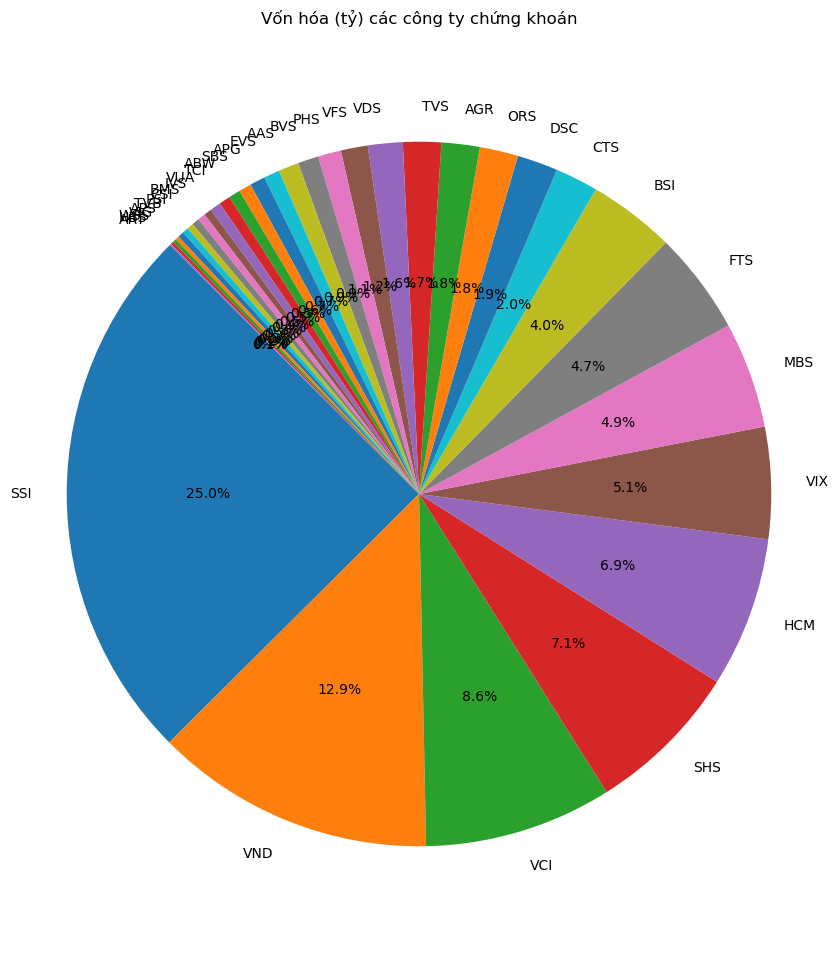

In [16]:
# Sắp xếp dữ liệu từ lớn đến bé
dfr_sorted = dfr.sort_values(by='Vốn hóa (tỷ)', ascending=False)

# Vẽ biểu đồ pie chart
plt.figure(figsize=(10, 12))
plt.pie(dfr_sorted["Vốn hóa (tỷ)"], labels=dfr_sorted["Mã CP"], autopct='%1.1f%%', startangle=135)
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.title('Vốn hóa (tỷ) các công ty chứng khoán')
plt.show()


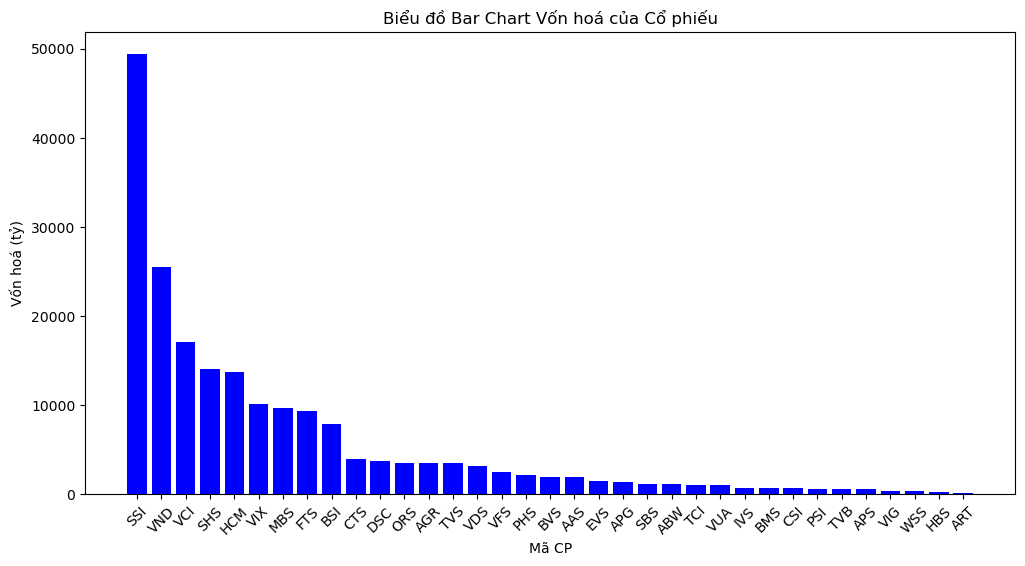

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

 
bar1 = ax.bar(dfr_sorted['Mã CP'], dfr_sorted['Vốn hóa (tỷ)'], label='Vốn hoá (tỷ)', color='blue')

ax.set_ylabel('Vốn hoá (tỷ)')
ax.set_xlabel('Mã CP')
ax.set_title('Biểu đồ Bar Chart Vốn hoá của Cổ phiếu')
ax.set_xticks(dfr_sorted['Mã CP'])
ax.set_xticklabels(dfr_sorted['Mã CP'], rotation=45)
ax.tick_params(axis='x', labelsize=10)

plt.show()

In [18]:
mean_p_e = dfr["P/E"].mean()
mean_p_b = dfr["P/B"].mean()
print(mean_p_e)
print(mean_p_b)


22.81142857142857
1.5342857142857145


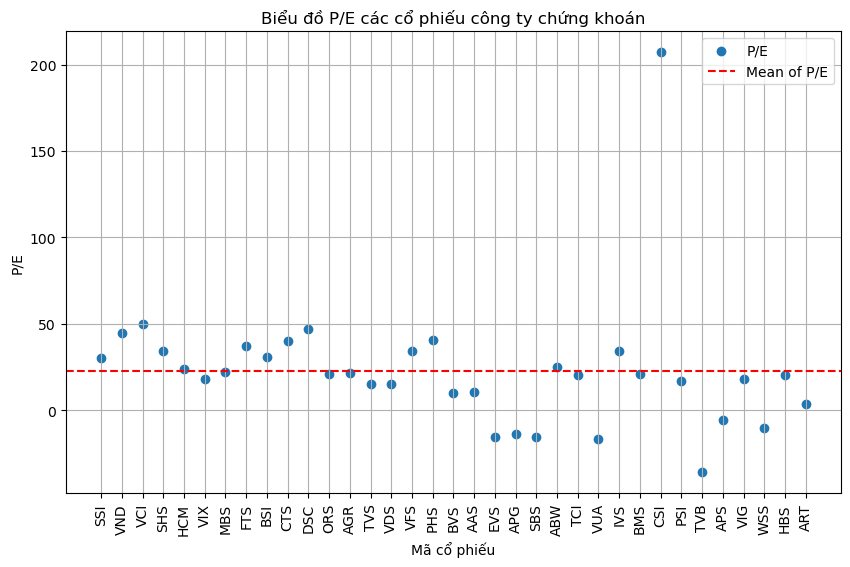

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data=dfr_sorted, x="Mã CP", y="P/E", marker="o", label="P/E")
plt.axhline(y=mean_p_e, color='r', linestyle='--', label="Mean of P/E")

plt.xlabel("Mã cổ phiếu")
plt.ylabel("P/E")
plt.title("Biểu đồ P/E các cổ phiếu công ty chứng khoán")
plt.xticks(rotation=90)
plt.grid()
plt.legend()  
plt.show()


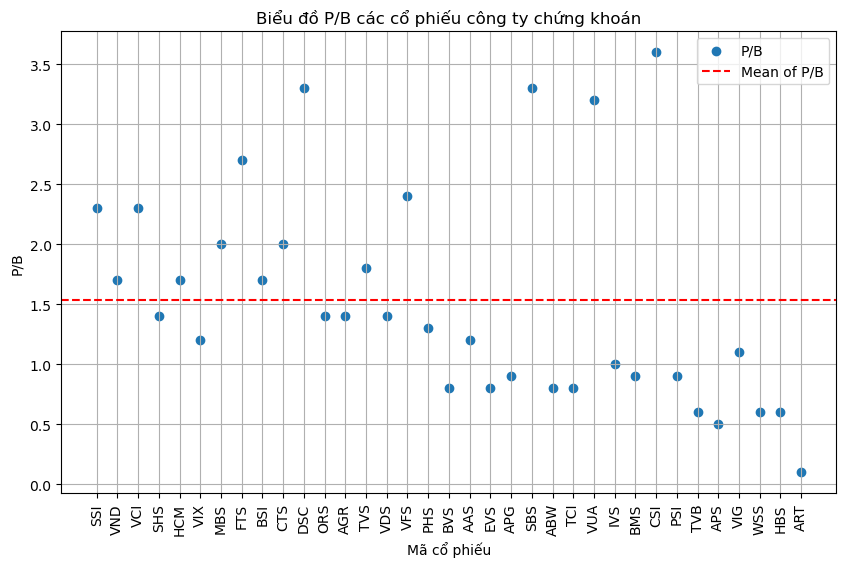

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(data=dfr_sorted, x="Mã CP", y="P/B", marker="o", label="P/B")
plt.axhline(y=mean_p_b, color='r', linestyle='--', label="Mean of P/B")

plt.xlabel("Mã cổ phiếu")
plt.ylabel("P/B")
plt.title("Biểu đồ P/B các cổ phiếu công ty chứng khoán")
plt.xticks(rotation=90)
plt.grid()
plt.legend()  
plt.show()


Based on the P/B and P/E ratio, we can observe the following:

- VIX and SHS have the P/B ratio lower than the average P/B ratio of securities companies.
- HCM and MBS have the P/B and P/E ratio closer to the average P/B and P/E ratios of securities companies.

Four stock symbols are among the 7 largest market capitalization securities companies. Therefore, we will concentrate on a more in-depth analysis of these four stocks.

In [21]:
last_stock_list = ['SHS', 'VIX', 'HCM', 'MBS']

In [22]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

for stock in last_stock_list:
    # Tạo DataFrame cho cổ phiếu và đặt cột "time" làm index
    stock_data = vn.stock_historical_data(stock, start, end, resolution='1D', type='stock')
    stock_data = stock_data.set_index("time")
    
    # Lưu DataFrame vào biến globals()
    globals()[stock] = stock_data


company_list = [SHS, VIX, HCM, MBS]
company_name = ["Chứng khoán SG - HN", "Chứng khoán VIX", "Chứng khoán TP HCM", "Chứng khoán MB"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    


In [23]:
df = pd.concat(company_list, axis=0)
#df.time = pd.to_datetime(df.time)
#df = df.set_index("time")
df.tail(10)


open   high    low  close   volume ticker    company_name
time                                                                  
2023-09-25  21800  22300  19700  19700  5782100    MBS  Chứng khoán MB
2023-09-26  19700  21600  19300  20700  6427200    MBS  Chứng khoán MB
2023-09-27  20700  22700  20700  22700  6298800    MBS  Chứng khoán MB
2023-09-28  22000  23400  22000  22900  6029700    MBS  Chứng khoán MB
2023-09-29  23100  23200  22200  22800  4888800    MBS  Chứng khoán MB
2023-10-02  22800  22900  21900  22000  5080500    MBS  Chứng khoán MB
2023-10-03  22000  22000  20000  20600  8090100    MBS  Chứng khoán MB
2023-10-04  20600  22500  19700  21700  4848800    MBS  Chứng khoán MB
2023-10-05  21900  22000  20600  20900  4404500    MBS  Chứng khoán MB
2023-10-06  20700  22100  20600  22000  4198400    MBS  Chứng khoán MB

In [24]:
SHS.describe()

open          high          low         close        volume
count    250.000000    250.000000    250.00000    250.000000  2.500000e+02
mean   11317.600000  11676.800000  11072.40000  11380.000000  1.901934e+07
std     3619.382538   3637.745804   3550.93718   3603.768665  9.549796e+06
min     4900.000000   5900.000000   4900.00000   5400.000000  3.766000e+06
25%     8600.000000   8900.000000   8400.00000   8600.000000  1.206522e+07
50%     9950.000000  10200.000000   9600.00000   9900.000000  1.690855e+07
75%    13975.000000  14350.000000  13700.00000  14150.000000  2.411972e+07
max    20600.000000  20700.000000  19800.00000  20500.000000  6.971370e+07

In [25]:
VIX.describe()

open          high           low         close        volume
count    250.00000    250.000000    250.000000    250.000000  2.500000e+02
mean    9587.87600   9814.436000   9343.596000   9591.440000  1.807564e+07
std     4454.66366   4535.071242   4316.133155   4459.861724  1.154332e+07
min     4280.00000   4770.000000   4280.000000   4600.000000  2.264300e+06
25%     6247.50000   6390.000000   6130.000000   6262.500000  9.756750e+06
50%     7060.00000   7295.000000   6860.000000   7075.000000  1.525565e+07
75%    11650.00000  11787.500000  11450.000000  11587.500000  2.316762e+07
max    20600.00000  20750.000000  19750.000000  20600.000000  6.855130e+07

In [26]:
HCM.describe()

open          high           low       close        volume
count    250.000000    250.000000    250.000000    250.0000  2.500000e+02
mean   25157.240000  25632.960000  24664.320000  25120.0800  6.012680e+06
std     4583.382502   4533.449625   4596.151146   4565.1228  2.673691e+06
min    13790.000000  15810.000000  13790.000000  14800.0000  1.664500e+06
25%    21842.500000  22322.500000  21415.000000  21720.0000  4.051725e+06
50%    24915.000000  25205.000000  24570.000000  24890.0000  5.468400e+06
75%    29000.000000  29787.500000  28562.500000  29037.5000  7.229275e+06
max    35900.000000  36150.000000  35000.000000  35850.0000  1.667700e+07

In [27]:
MBS.describe()

open          high           low         close        volume
count    250.000000    250.000000    250.000000    250.000000  2.500000e+02
mean   14569.720000  15094.600000  14276.680000  14704.240000  2.930109e+06
std     3648.287093   3605.179345   3567.180805   3581.485022  1.580492e+06
min     7040.000000   8610.000000   7040.000000   7830.000000  4.521000e+05
25%    11740.000000  12260.000000  11480.000000  11850.000000  1.707450e+06
50%    14130.000000  14610.000000  13910.000000  14260.000000  2.712750e+06
75%    17130.000000  17585.000000  16700.000000  17130.000000  3.787250e+06
max    24600.000000  25000.000000  24100.000000  24500.000000  8.090100e+06

In [28]:
MBS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 2022-10-10 to 2023-10-06
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   open          250 non-null    int32 
 1   high          250 non-null    int32 
 2   low           250 non-null    int32 
 3   close         250 non-null    int32 
 4   volume        250 non-null    int64 
 5   ticker        250 non-null    object
 6   company_name  250 non-null    object
dtypes: int32(4), int64(1), object(2)
memory usage: 11.7+ KB


## Closing Price

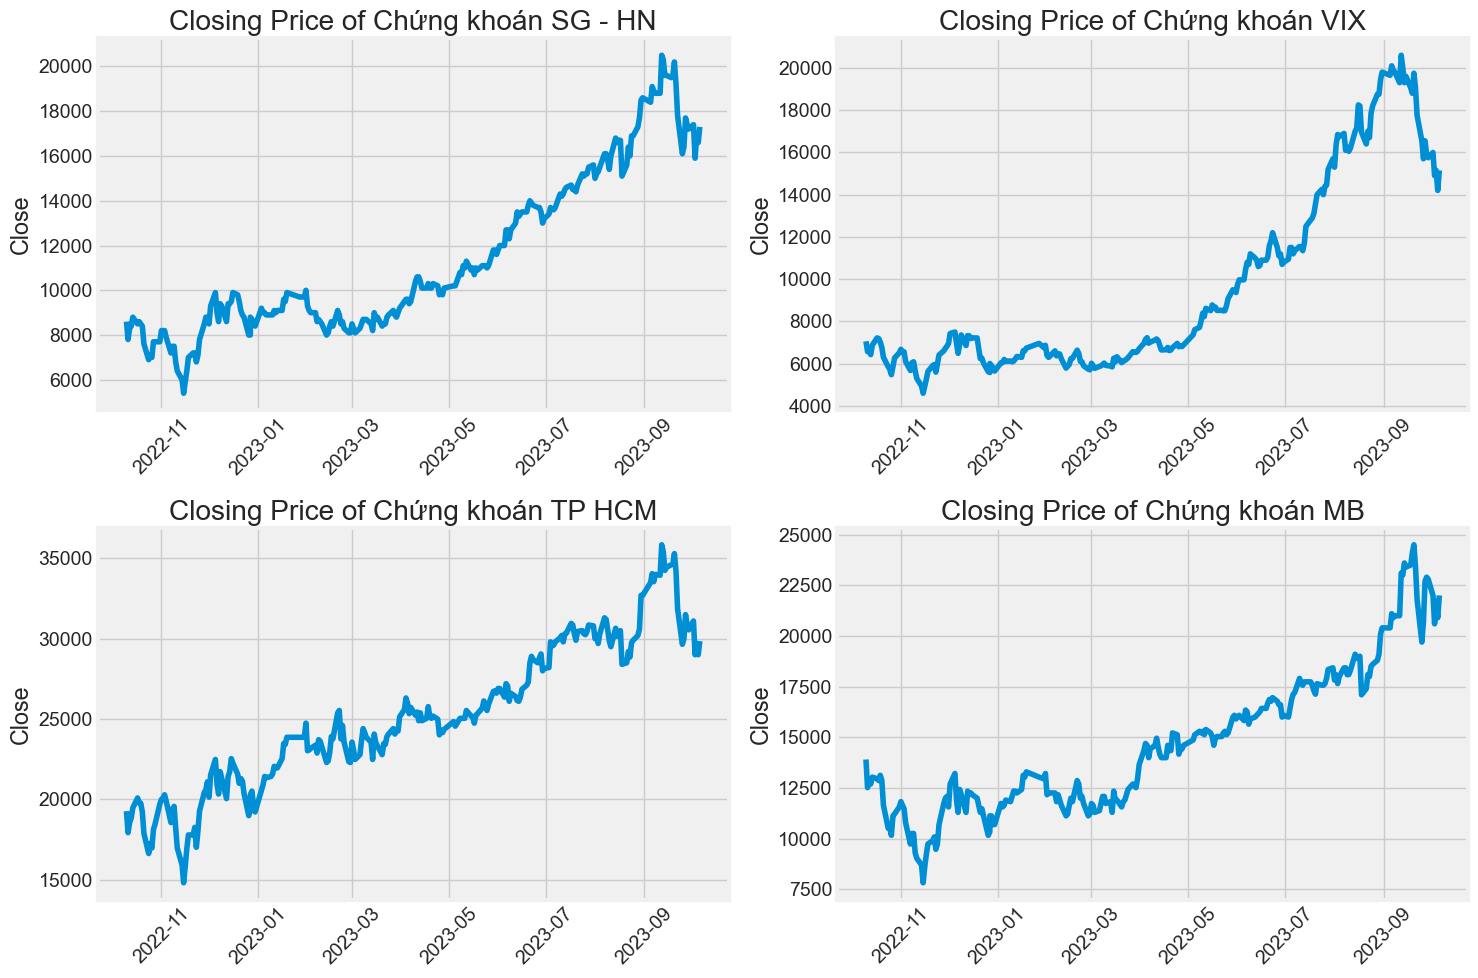

In [29]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    ax = plt.plot(company['close'] )
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.xticks(rotation = 45)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

## Volume of Sales

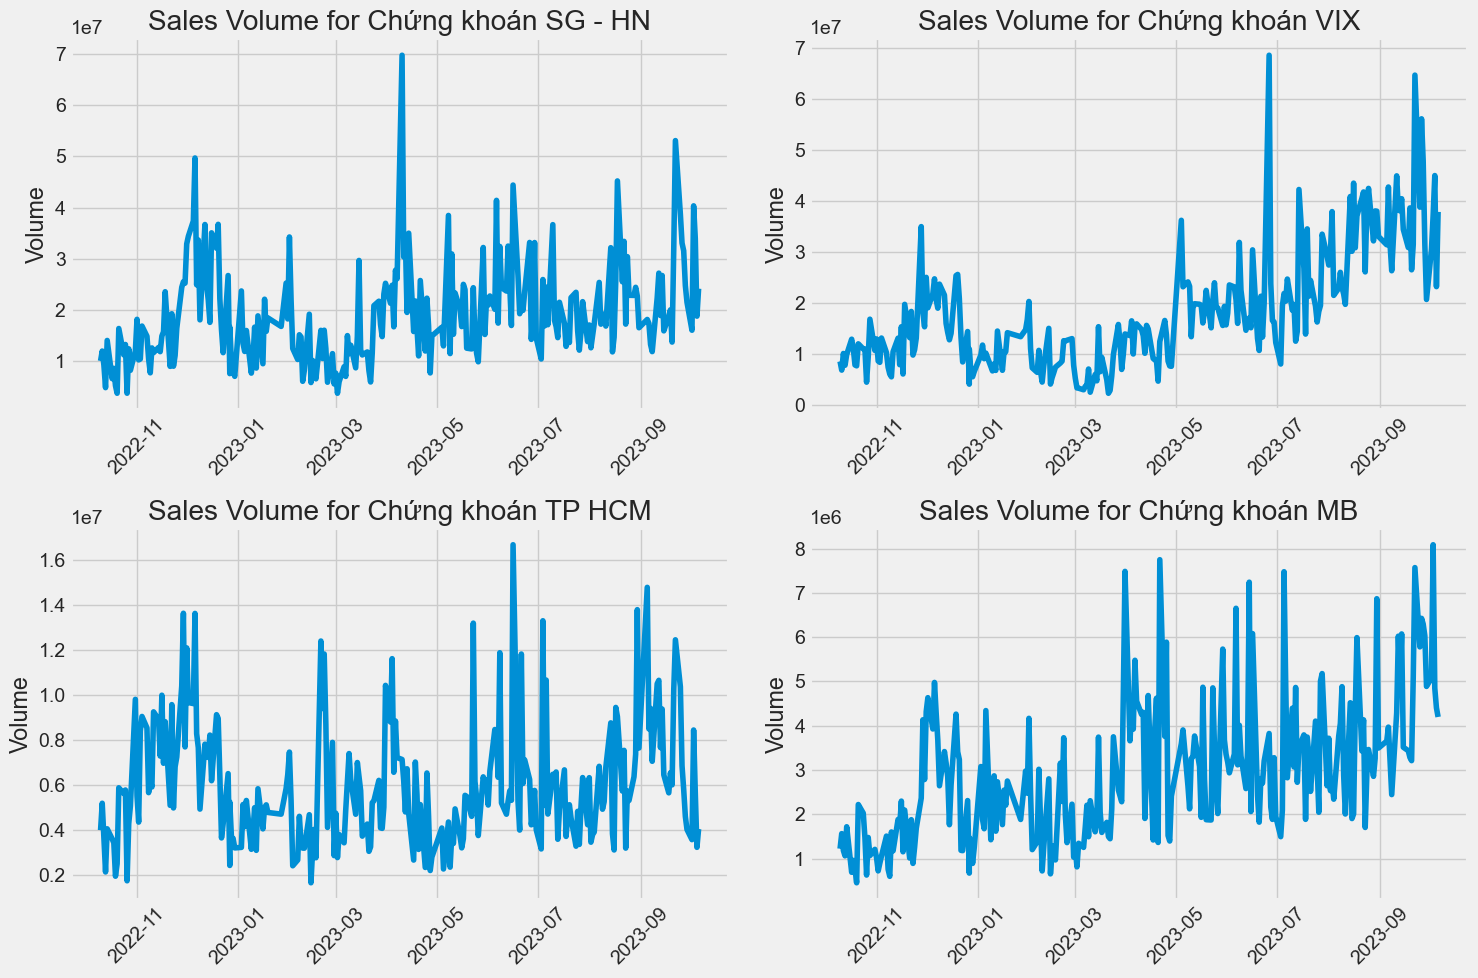

In [30]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    ax = plt.plot(company['volume'] )
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.xticks(rotation = 45)
    plt.title(f"Sales Volume for {company_name[i - 1]}")
    
plt.tight_layout()

## Moving average

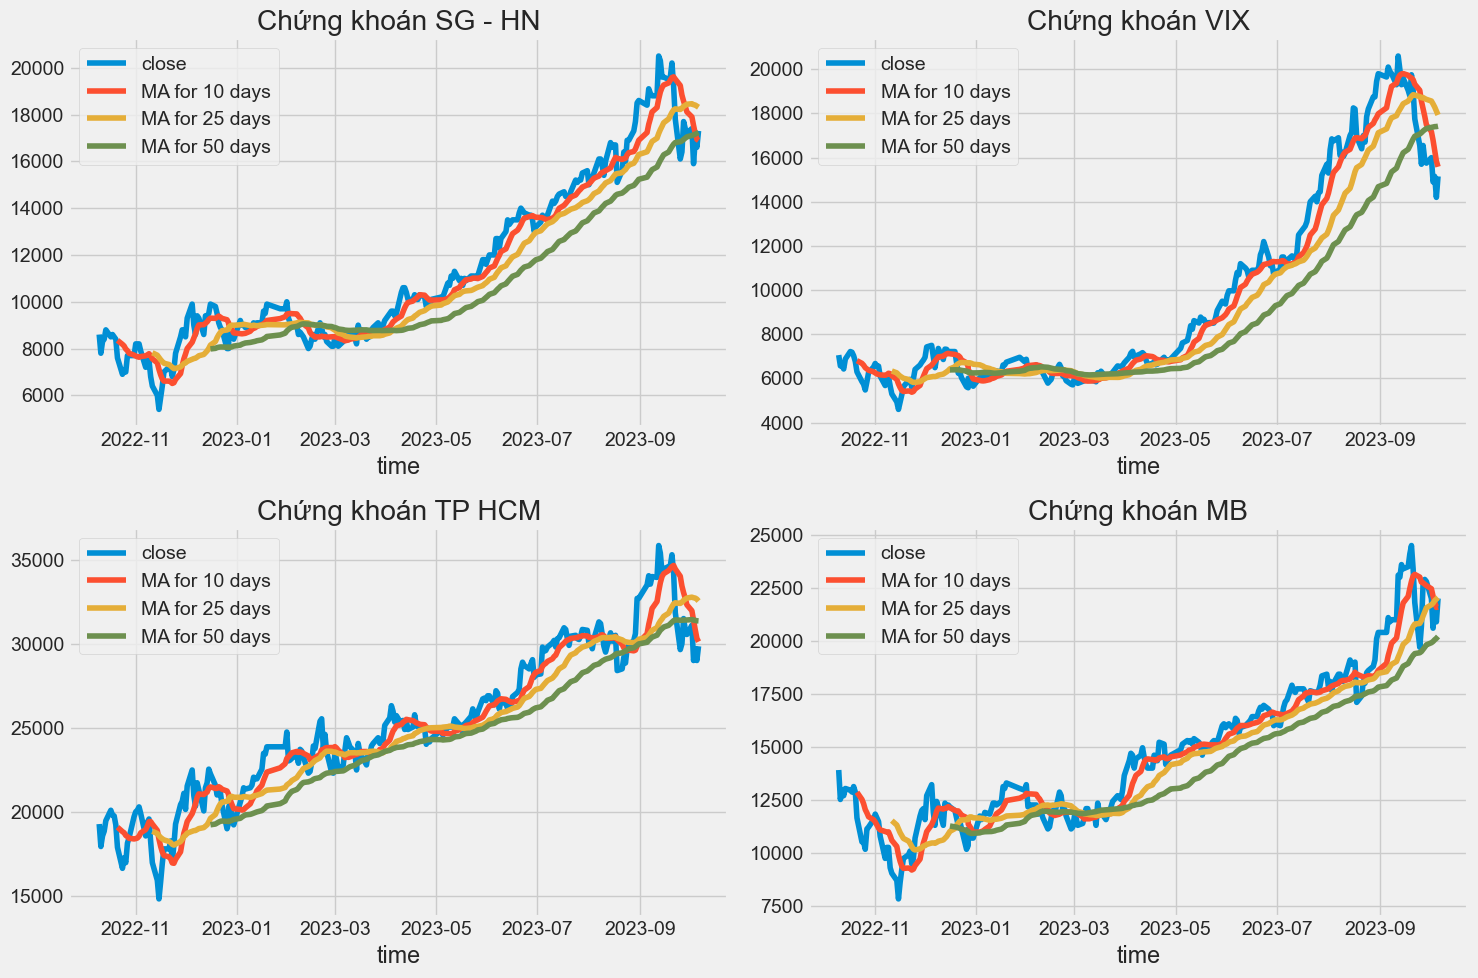

In [31]:
ma_day = [10, 25, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

SHS[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Chứng khoán SG - HN')

VIX[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Chứng khoán VIX')

HCM[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Chứng khoán TP HCM')

MBS[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Chứng khoán MB')

fig.tight_layout()

## The daily return of the stock on average

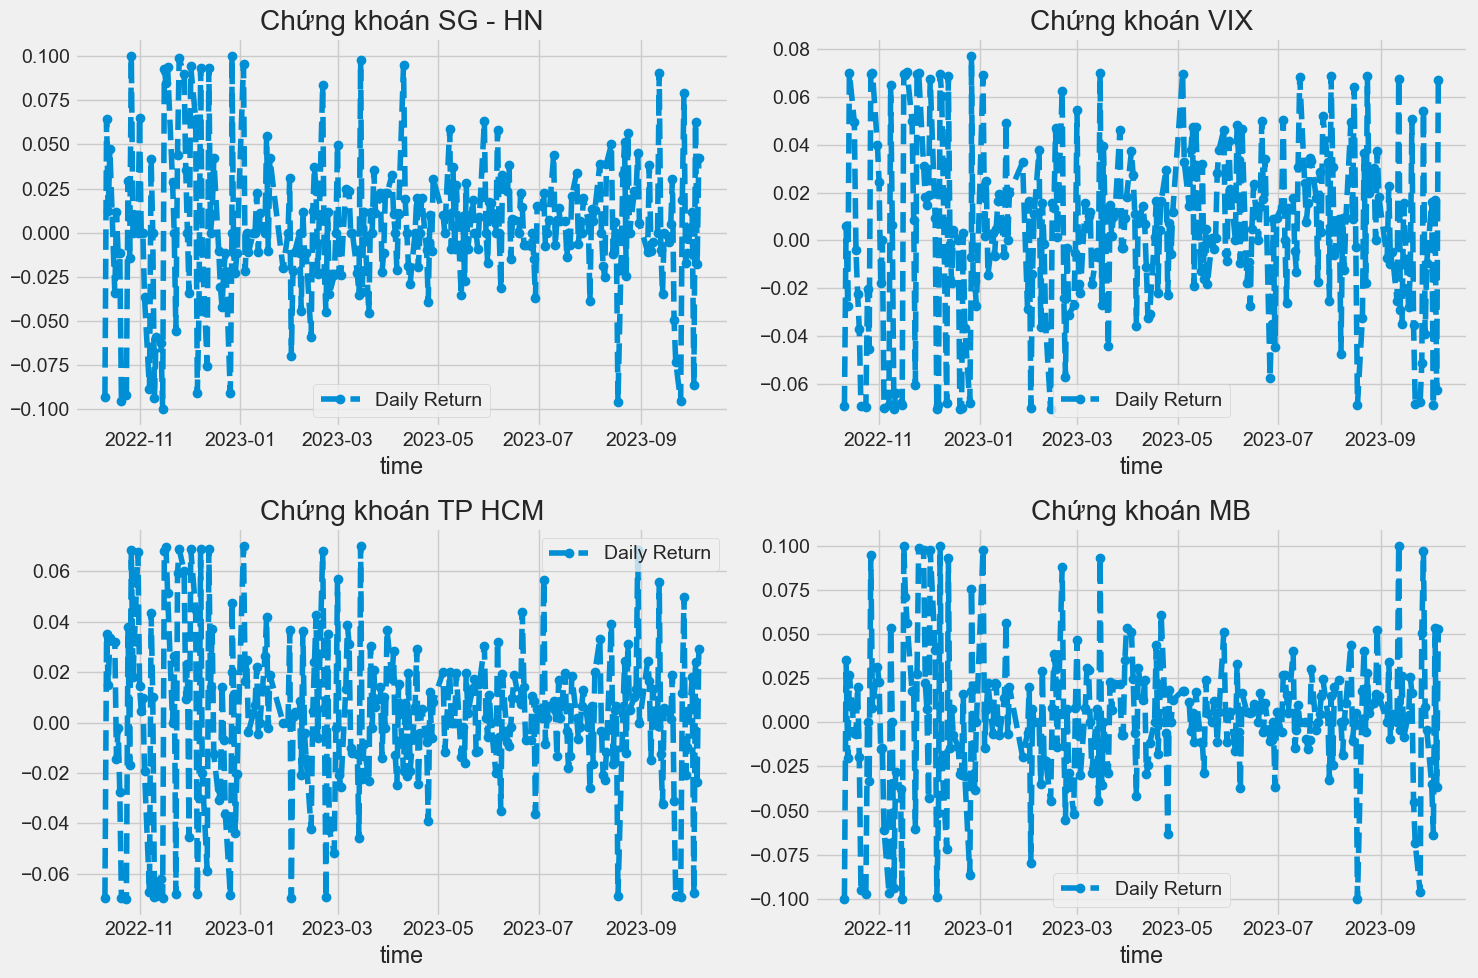

In [32]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

SHS['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Chứng khoán SG - HN')

VIX['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Chứng khoán VIX')

HCM['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Chứng khoán TP HCM')

MBS['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Chứng khoán MB')

fig.tight_layout()

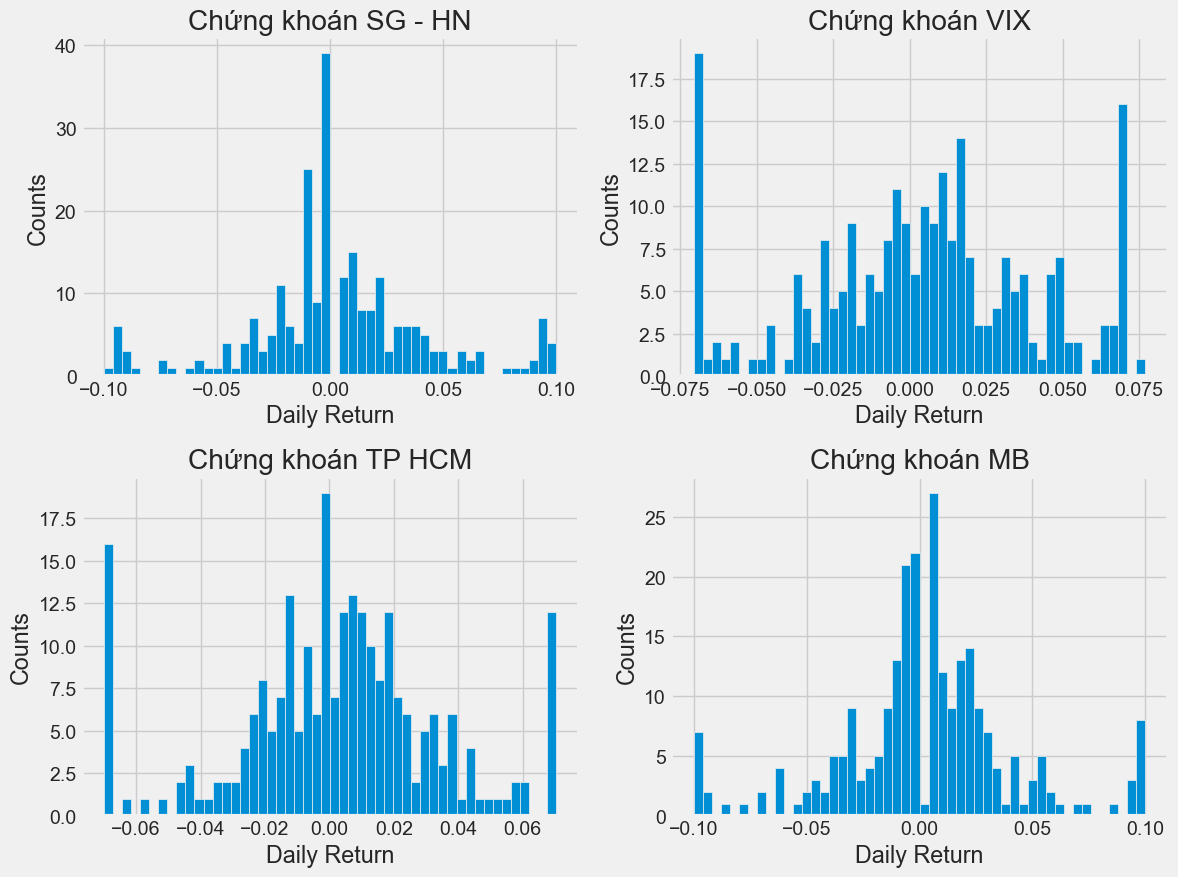

In [33]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## The correlation between different stocks closing prices

In [34]:
df

open   high    low  close    volume ticker         company_name
time                                                                        
2022-10-10   7900   8900   7900   8600  10076100    SHS  Chứng khoán SG - HN
2022-10-11   8400   8700   7800   7800  12006200    SHS  Chứng khoán SG - HN
2022-10-12   7700   8500   7600   8300   9280400    SHS  Chứng khoán SG - HN
2022-10-13   8400   8600   8200   8400   4863900    SHS  Chứng khoán SG - HN
2022-10-14   8500   9100   8500   8800  14071400    SHS  Chứng khoán SG - HN
...           ...    ...    ...    ...       ...    ...                  ...
2023-10-02  22800  22900  21900  22000   5080500    MBS       Chứng khoán MB
2023-10-03  22000  22000  20000  20600   8090100    MBS       Chứng khoán MB
2023-10-04  20600  22500  19700  21700   4848800    MBS       Chứng khoán MB
2023-10-05  21900  22000  20600  20900   4404500    MBS       Chứng khoán MB
2023-10-06  20700  22100  20600  22000   4198400    MBS       Chứng khoán MB

[1000 rows x 7 columns]

In [35]:
df2 = df.reset_index()
df2

time   open   high    low  close    volume ticker  \
0    2022-10-10   7900   8900   7900   8600  10076100    SHS   
1    2022-10-11   8400   8700   7800   7800  12006200    SHS   
2    2022-10-12   7700   8500   7600   8300   9280400    SHS   
3    2022-10-13   8400   8600   8200   8400   4863900    SHS   
4    2022-10-14   8500   9100   8500   8800  14071400    SHS   
..          ...    ...    ...    ...    ...       ...    ...   
995  2023-10-02  22800  22900  21900  22000   5080500    MBS   
996  2023-10-03  22000  22000  20000  20600   8090100    MBS   
997  2023-10-04  20600  22500  19700  21700   4848800    MBS   
998  2023-10-05  21900  22000  20600  20900   4404500    MBS   
999  2023-10-06  20700  22100  20600  22000   4198400    MBS   

            company_name  
0    Chứng khoán SG - HN  
1    Chứng khoán SG - HN  
2    Chứng khoán SG - HN  
3    Chứng khoán SG - HN  
4    Chứng khoán SG - HN  
..                   ...  
995       Chứng khoán MB  
996       Chứng khoán MB  
997       Chứng khoán MB  
998       Chứng khoán MB  
999       Chứng khoán MB  

[1000 rows x 8 columns]

In [36]:
# Tạo DataFrame cho từng ticker
df_HCM = df2[df2['ticker'] == 'HCM'][['time', 'close']].set_index('time').rename(columns={'close': 'HCM'})
df_MBS = df2[df2['ticker'] == 'MBS'][['time', 'close']].set_index('time').rename(columns={'close': 'MBS'})
df_SHS = df2[df2['ticker'] == 'SHS'][['time', 'close']].set_index('time').rename(columns={'close': 'SHS'})
df_VIX = df2[df2['ticker'] == 'VIX'][['time', 'close']].set_index('time').rename(columns={'close': 'VIX'})

# Kết hợp các DataFrame theo cột 'time'
closing_df = pd.concat([df_SHS, df_VIX, df_HCM, df_MBS], axis=1)

# Hiển thị DataFrame mới
closing_df


SHS    VIX    HCM    MBS
time                                  
2022-10-10   8600   7060  19260  13910
2022-10-11   7800   6570  17920  12520
2022-10-12   8300   6610  18550  12960
2022-10-13   8400   6430  18830  12700
2022-10-14   8800   6880  19460  13040
...           ...    ...    ...    ...
2023-10-02  17400  16000  31100  22000
2023-10-03  15900  14900  29000  20600
2023-10-04  16900  15150  29700  21700
2023-10-05  16600  14200  29000  20900
2023-10-06  17300  15150  29850  22000

[250 rows x 4 columns]

In [37]:
stock_rets = closing_df.pct_change()
stock_rets

SHS       VIX       HCM       MBS
time                                              
2022-10-10       NaN       NaN       NaN       NaN
2022-10-11 -0.093023 -0.069405 -0.069574 -0.099928
2022-10-12  0.064103  0.006088  0.035156  0.035144
2022-10-13  0.012048 -0.027231  0.015094 -0.020062
2022-10-14  0.047619  0.069984  0.033457  0.026772
...              ...       ...       ...       ...
2023-10-02  0.011628  0.015873  0.018003 -0.035088
2023-10-03 -0.086207 -0.068750 -0.067524 -0.063636
2023-10-04  0.062893  0.016779  0.024138  0.053398
2023-10-05 -0.017751 -0.062706 -0.023569 -0.036866
2023-10-06  0.042169  0.066901  0.029310  0.052632

[250 rows x 4 columns]

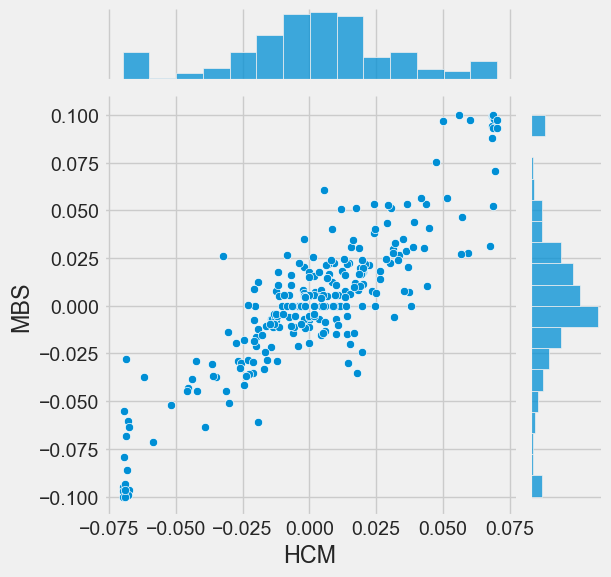

In [38]:
sns.jointplot(x='HCM', y='MBS', data=stock_rets.reset_index(), kind='scatter')

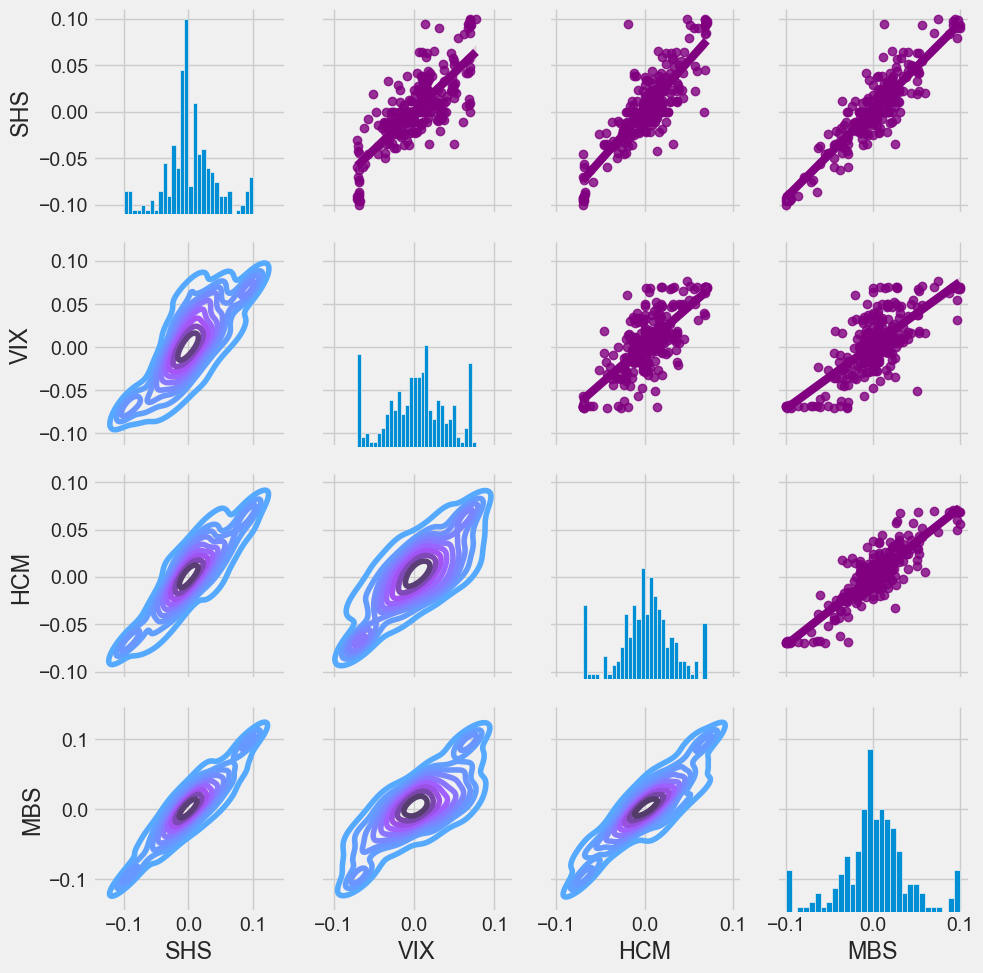

In [39]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(stock_rets.reset_index().dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(sns.regplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

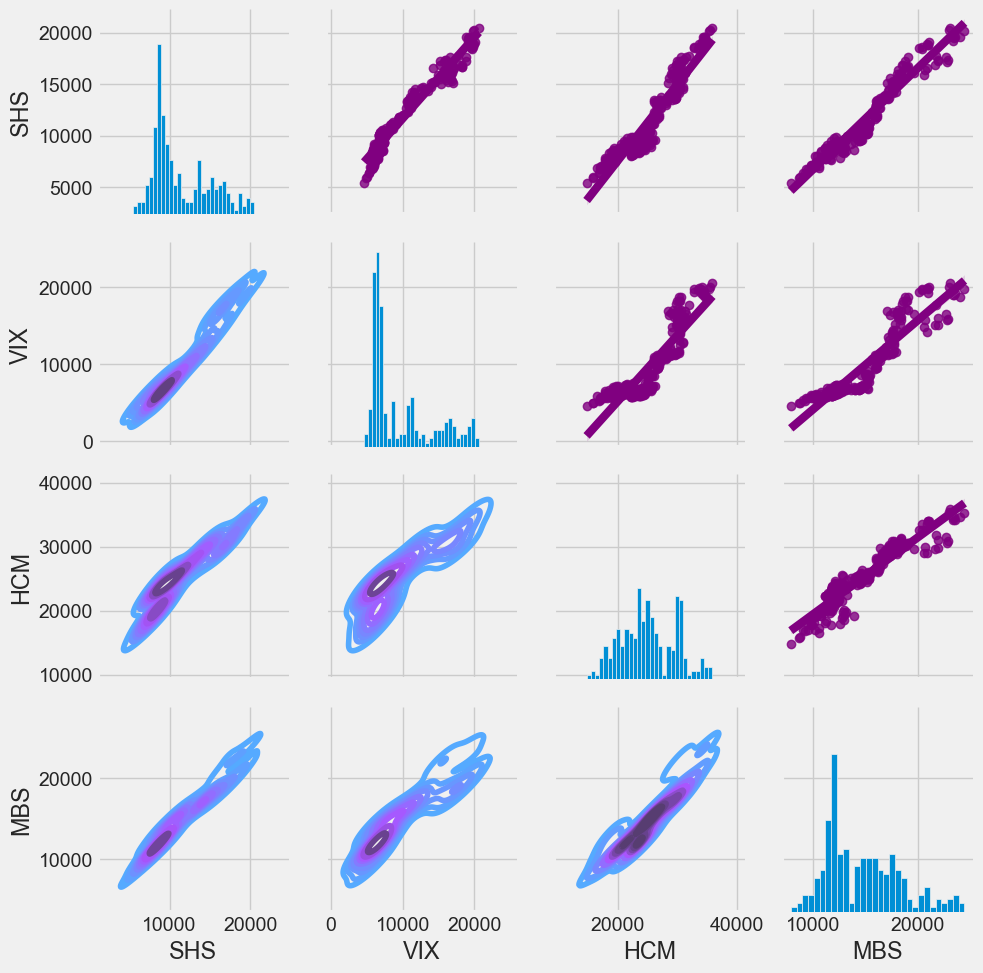

In [40]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(closing_df.reset_index())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(sns.regplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)


Text(0.5, 1.0, 'Correlation of stock closing price')

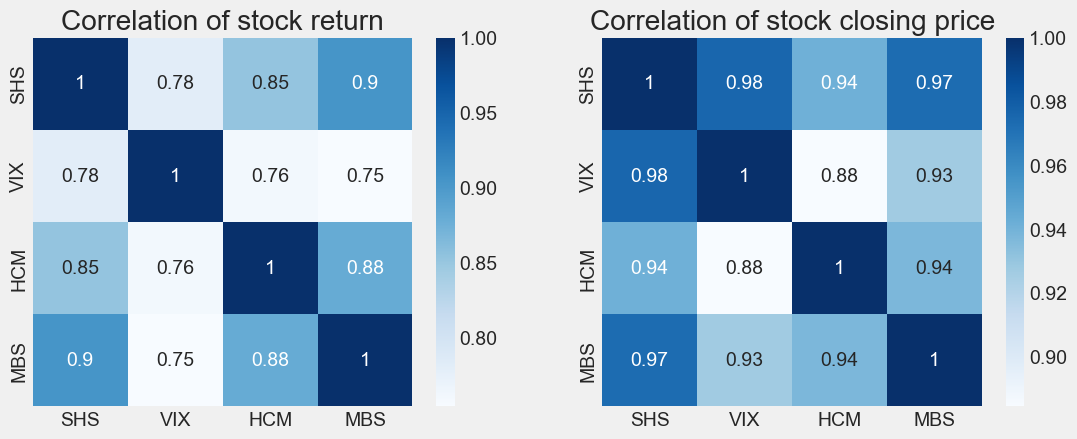

In [41]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(stock_rets.corr(), annot=True, cmap='Blues')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation of stock closing price')

Through correlation analysis, it is shown that the prices of the four securities companies are positively correlated with each other.

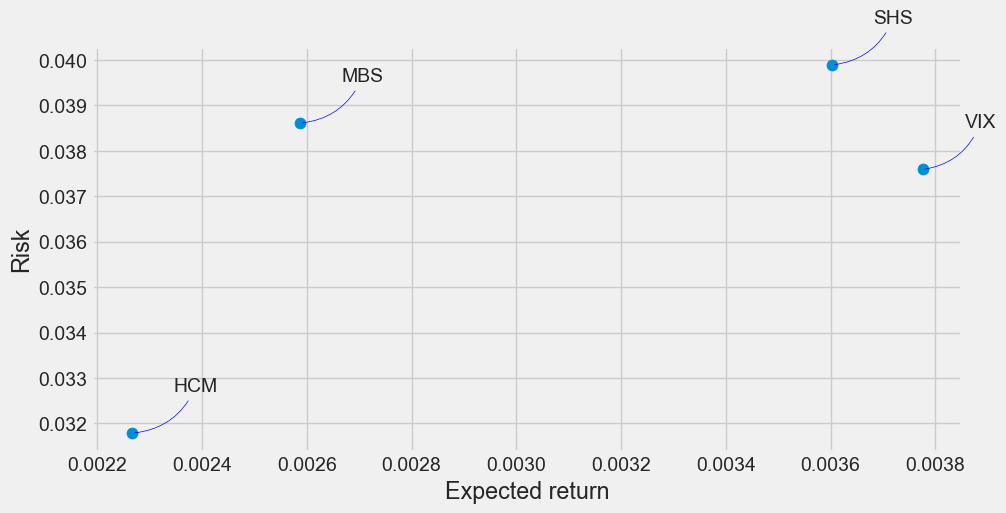

In [42]:
rets = stock_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 5))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(30, 30), 
                 textcoords='offset points', 
                 arrowprops=dict(arrowstyle='-', 
                                 color='blue', 
                                 connectionstyle='arc3,rad=-0.3')
                )


In [43]:
end = datetime.now()
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

data = vn.stock_historical_data('VIX', start, end, resolution='1D',
                                type='stock').set_index("time")
data.head()


open  high   low  close  volume ticker
time                                              
2012-10-09  1450  1520  1450   1520    2500    VIX
2012-10-10  1520  1520  1520   1520       0    VIX
2012-10-11  1520  1520  1430   1470   27600    VIX
2012-10-12  1500  1500  1500   1500    1500    VIX
2012-10-15  1500  1500  1500   1500       0    VIX

In [44]:
# Adding indicators
data['RSI']=ta.rsi(data.close, length=15)
data['EMAF']=ta.ema(data.close, length=20)
data['EMAM']=ta.ema(data.close, length=100)
data['EMAS']=ta.ema(data.close, length=150)


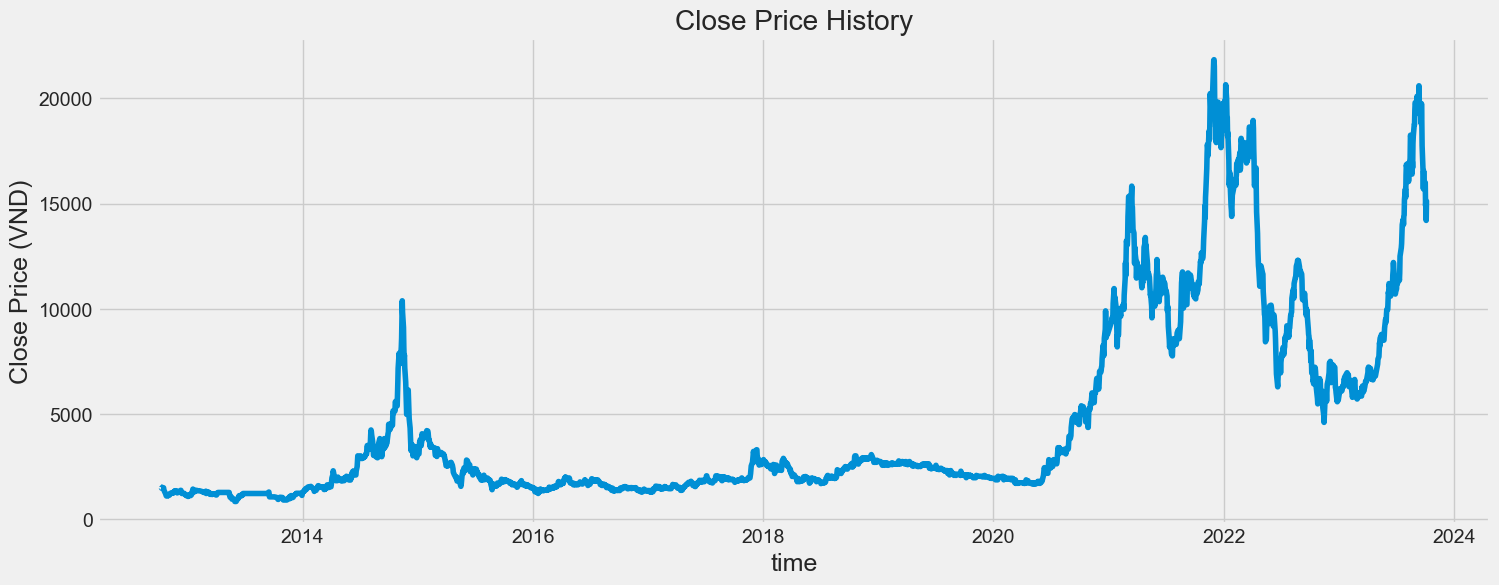

In [45]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data['close'])
plt.xlabel('time', fontsize=18)
plt.ylabel('Close Price (VND)', fontsize=18)
plt.show()

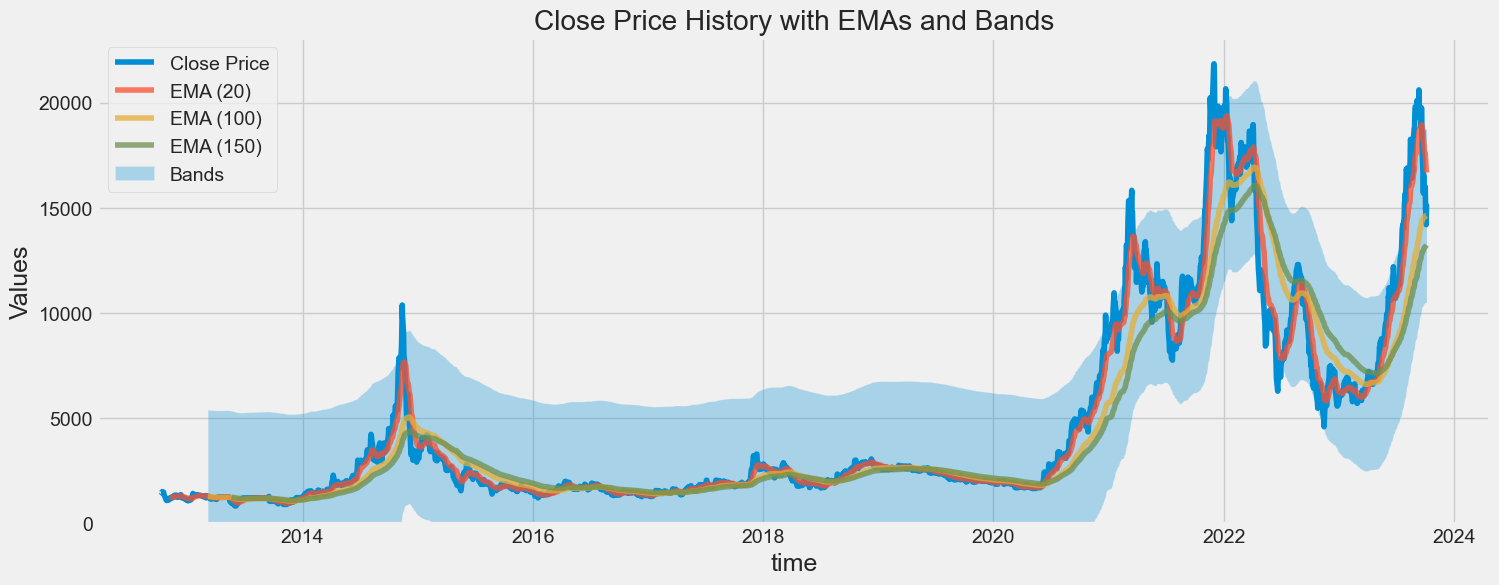

In [46]:
plt.figure(figsize=(16, 6))
plt.title('Close Price History with EMAs and Bands')
plt.plot(data['close'], label='Close Price')

# Plot EMAs with reduced opacity
plt.plot(data['EMAF'], label='EMA (20)', alpha=0.75)
plt.plot(data['EMAM'], label='EMA (100)', alpha=0.75)
plt.plot(data['EMAS'], label='EMA (150)', alpha=0.75)

# Calculate upper and lower bands with 1 standard deviation
upper_band = data['EMAM'] + data['EMAM'].std()
lower_band = data['EMAM'] - data['EMAM'].std()

# Plot upper and lower bands
plt.fill_between(data.index, upper_band, lower_band, alpha=0.3, label='Bands')

plt.xlabel('time', fontsize=18)

plt.ylabel('Values', fontsize=18)
plt.ylim(0, None)
plt.legend(loc='upper left')
plt.show()


In [47]:
# Drop duplicate indices

data = data.loc[~data.index.duplicated(keep='first')]  

# Set the frequency to daily and forward fill missing values

data = data.asfreq('D', method='ffill')

data.close

time
2012-10-09     1520
2012-10-10     1520
2012-10-11     1470
2012-10-12     1500
2012-10-13     1500
              ...  
2023-10-02    16000
2023-10-03    14900
2023-10-04    15150
2023-10-05    14200
2023-10-06    15150
Freq: D, Name: close, Length: 4015, dtype: int32

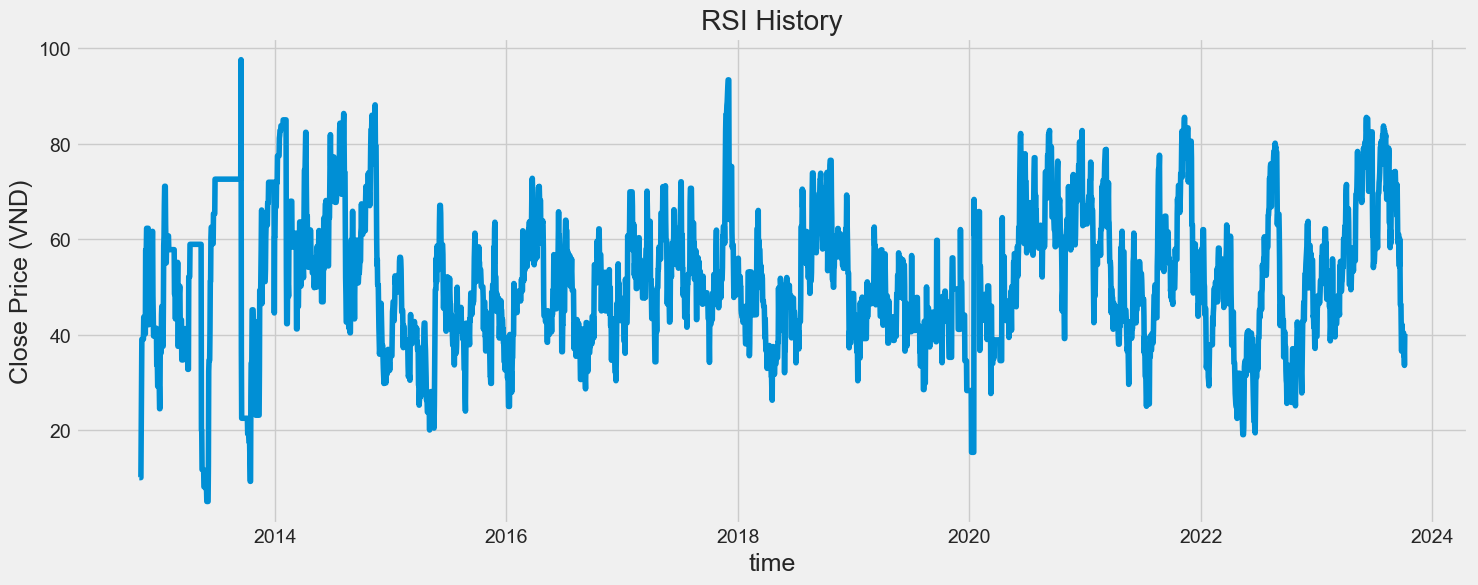

In [48]:
plt.figure(figsize=(16,6))
plt.title('RSI History')
plt.plot(data['RSI'])
plt.xlabel('time', fontsize=18)
plt.ylabel('Close Price (VND)', fontsize=18)
plt.show()

<Figure size 640x480 with 0 Axes>

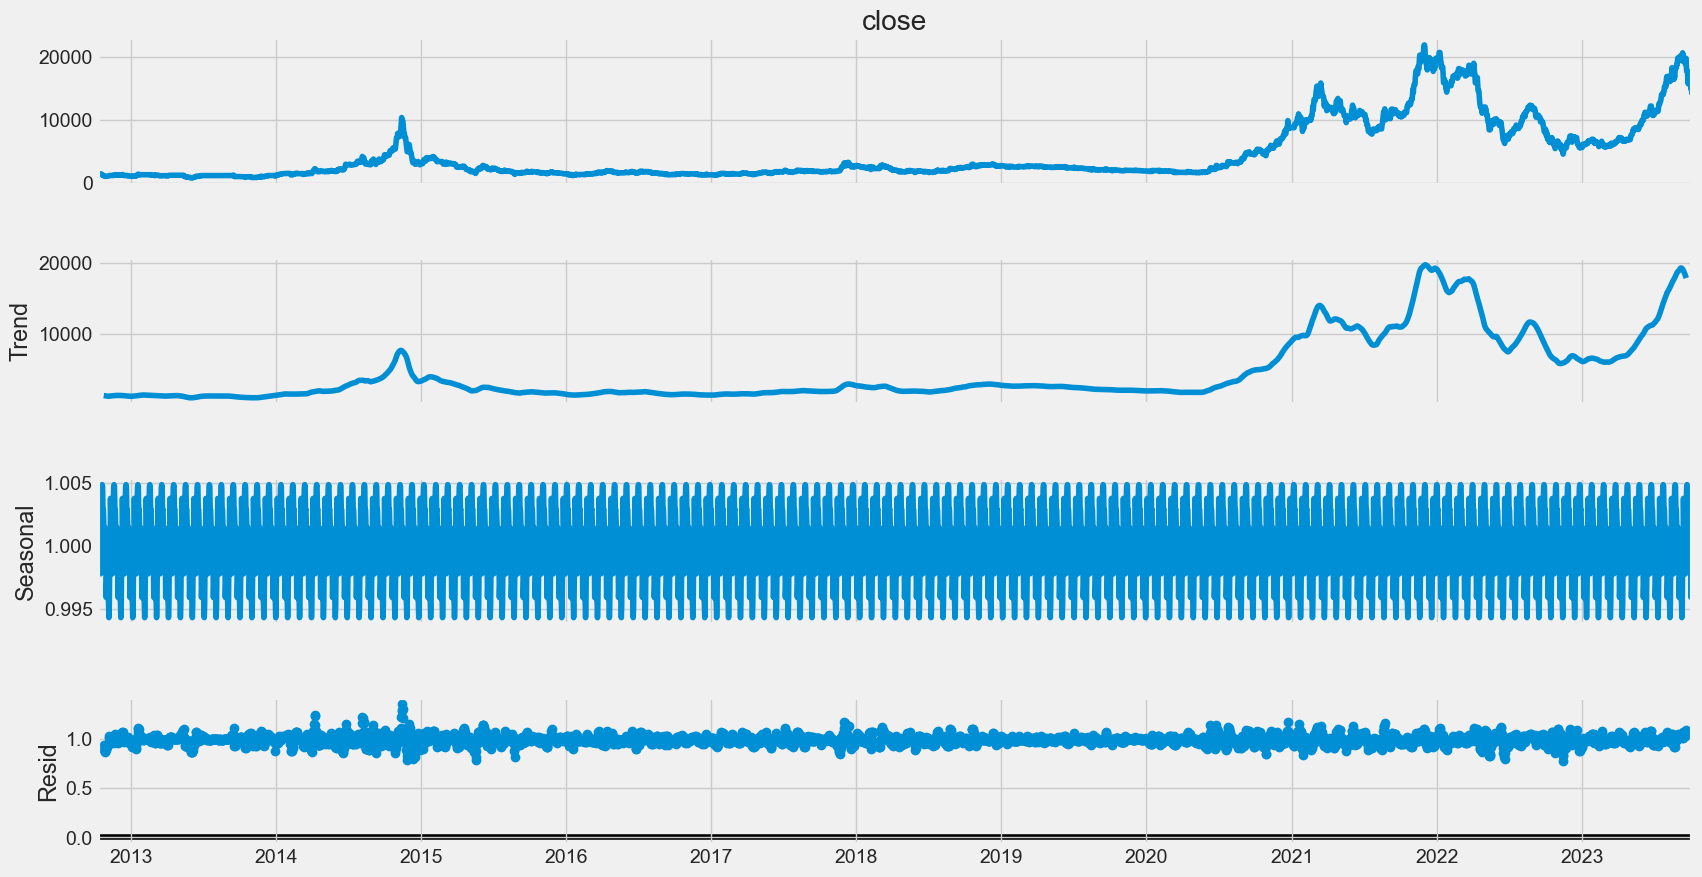

In [49]:
# Checking decomposition of trend, seasonality and residue of the original time seires.
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['close'], 
                                   model='multiplicative', period=30)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(20, 10)

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -1.436014
p-value: 0.564894
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 5.402189
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Admin\AppData\Local\Temp\ipykernel_11480\4138709452.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)


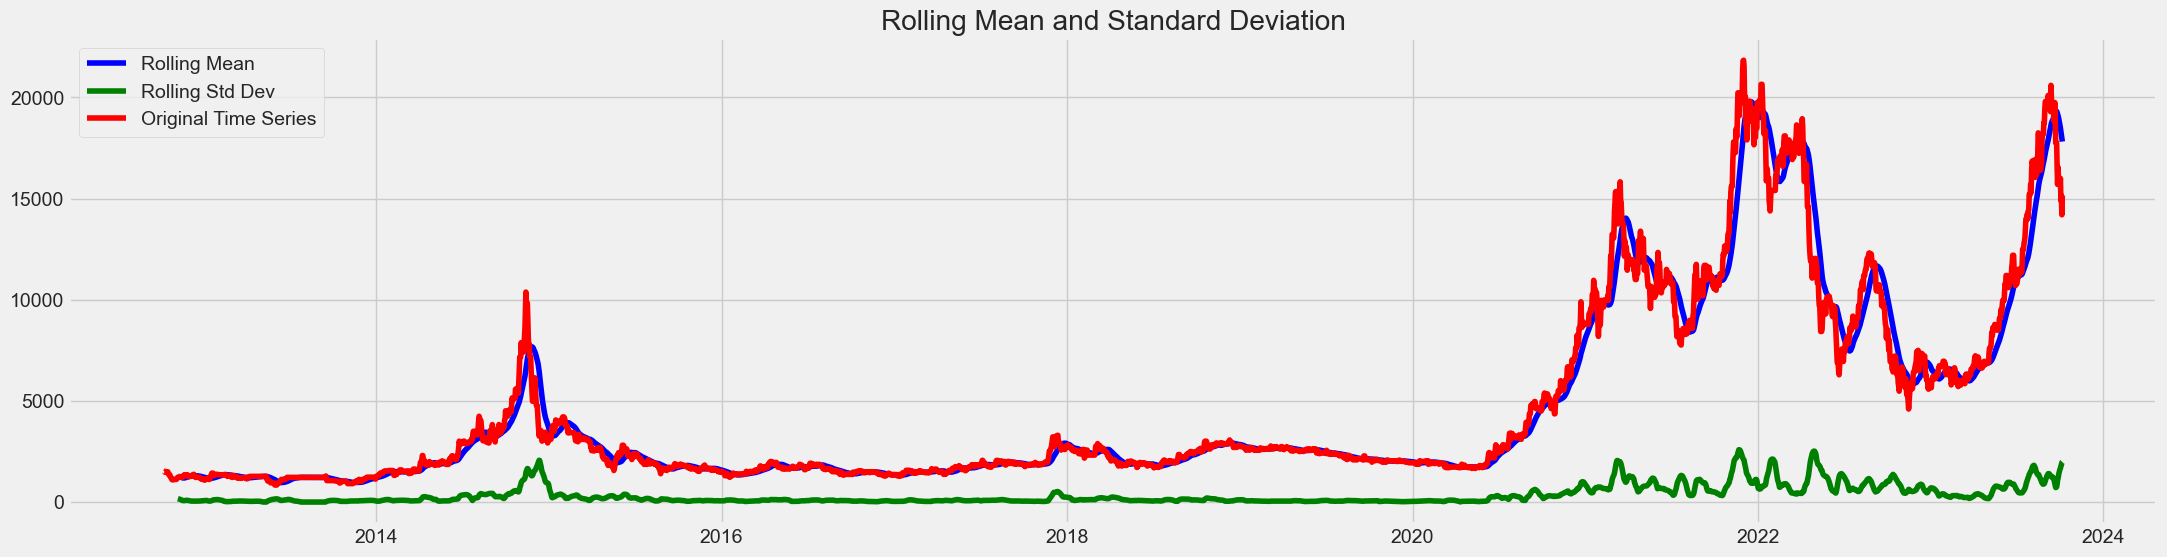

In [50]:
#Testing for stationarity using ADF and KPSS Tests.
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, color='blue', label='Rolling Mean')
    plt.plot(rolling_std_dev, color='green', label = 'Rolling Std Dev')
    plt.plot(stock_close_price, color='red',label='Original Time Series')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))
    
stationarity_test(data['close'])

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -1.012404
p-value: 0.748713
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 6.507883
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Admin\AppData\Local\Temp\ipykernel_11480\1171929005.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)


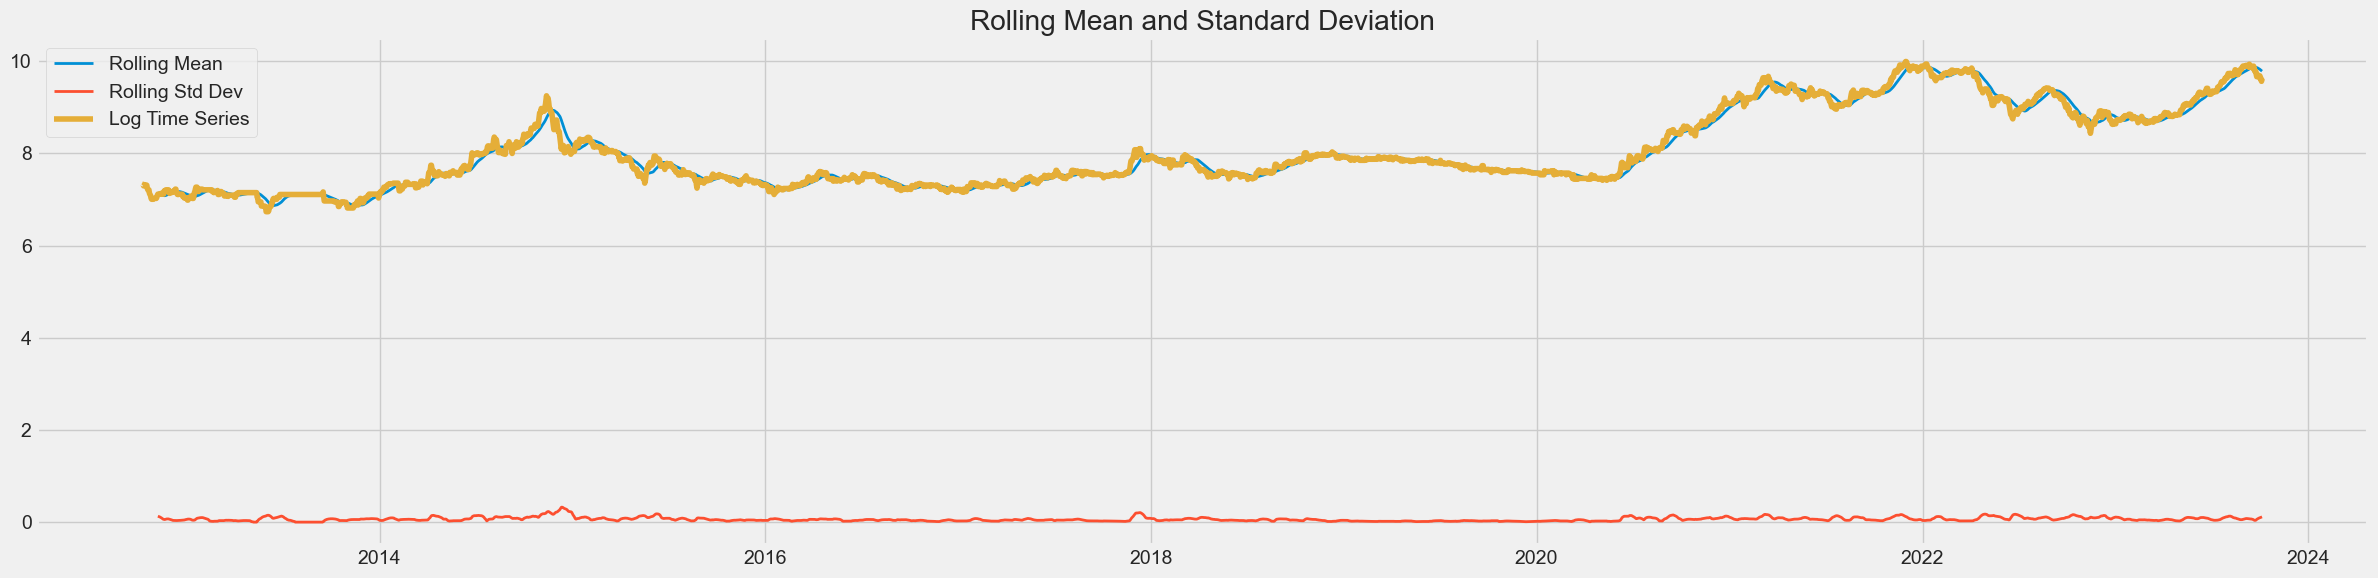

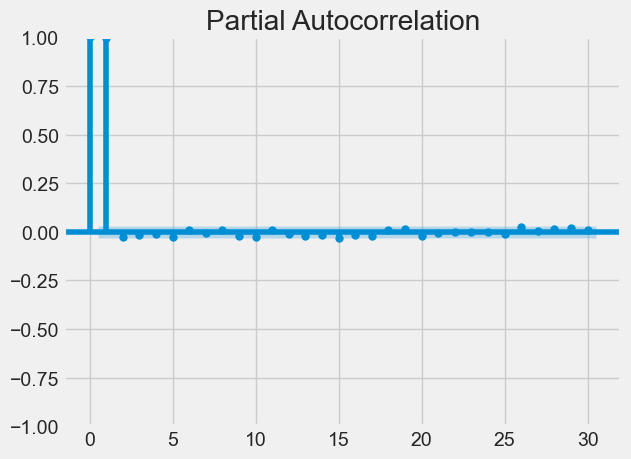

In [51]:
#Testing for stationarity of de-trended time series using ADF and KPSS Tests.

data['Close_Log'] = np.log(data['close'])

def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, label='Rolling Mean',linewidth=2.0)
    plt.plot(rolling_std_dev, label = 'Rolling Std Dev',linewidth=2.0)
    plt.plot(stock_close_price,label='Log Time Series')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.tight_layout()
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))

stationarity_test(data['Close_Log'].dropna())

# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(data['Close_Log'].dropna(), lags=30)

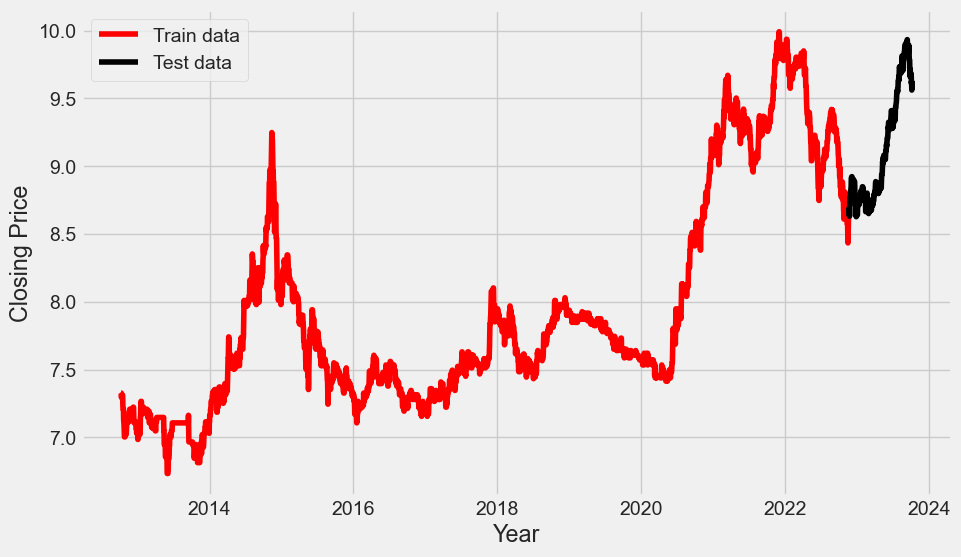

In [52]:
#split data into train and training set
Stock_data_arima = data['Close_Log']
test_size = int(len(Stock_data_arima)*0.08
                            
                            )
train_data, test_data = Stock_data_arima[:-test_size], Stock_data_arima[-test_size:]


# Plotting the train and test sets.
plt.figure(figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.plot(train_data, 'red', label='Train data')
plt.plot(test_data, 'black', label='Test data')
plt.legend()

In [53]:
from pmdarima import auto_arima
from math import *
from statsmodels.tsa.arima.model import ARIMA


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15572.218, Time=1.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15600.134, Time=0.57 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15600.891, Time=1.90 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15573.679, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15599.521, Time=2.44 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15599.311, Time=4.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15597.337, Time=1.75 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-15602.435, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-15601.053, Time=0.67 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-15600.823, Time=1.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-15601.685, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-15598.837, Time=0.65 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 15.513 seconds
                               SARIMAX Results                 

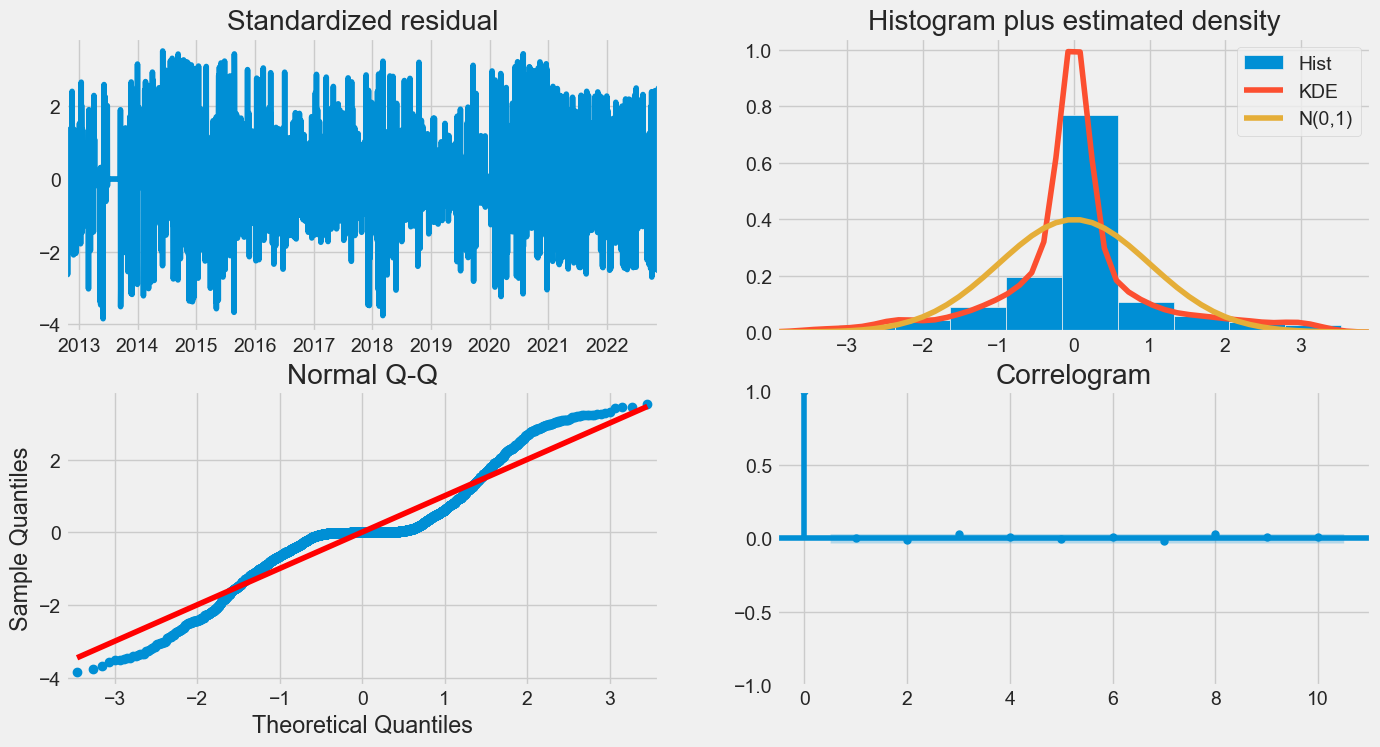

In [54]:
model = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())
model.plot_diagnostics(figsize=(15,8))
plt.show()

In [55]:
# Forecast
fc, conf = model.predict(n = len(test_data), alpha=0.05, return_conf_int=True)  # 95% conf

In [56]:
prediction, confint = model.predict(n_periods= test_size, alpha=0.05, return_conf_int=True)


In [57]:
cf= pd.DataFrame(confint)

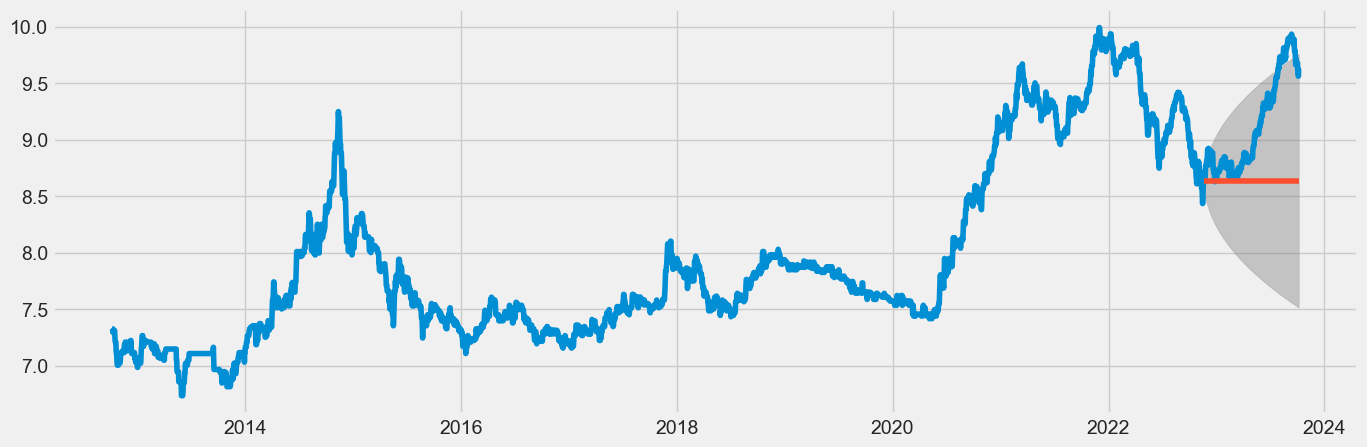

In [58]:
prediction_series = pd.Series(prediction,index=test_data.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(Stock_data_arima)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.4)

In [59]:
def calcsmape(actual, forecast):
    return 1/len(actual) * np.sum(2 * np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast)))

In [60]:
smape=calcsmape(test_data,prediction)
smape

0.05359745416467232

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16942.287, Time=0.72 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16967.232, Time=0.61 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16968.051, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16942.754, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16967.425, Time=1.86 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-16966.831, Time=1.56 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-16964.722, Time=2.50 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-16968.731, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-16968.057, Time=0.50 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-16967.446, Time=1.43 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-16967.925, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-16965.329, Time=0.66 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 12.308 seconds
                               SARIMAX Results                 

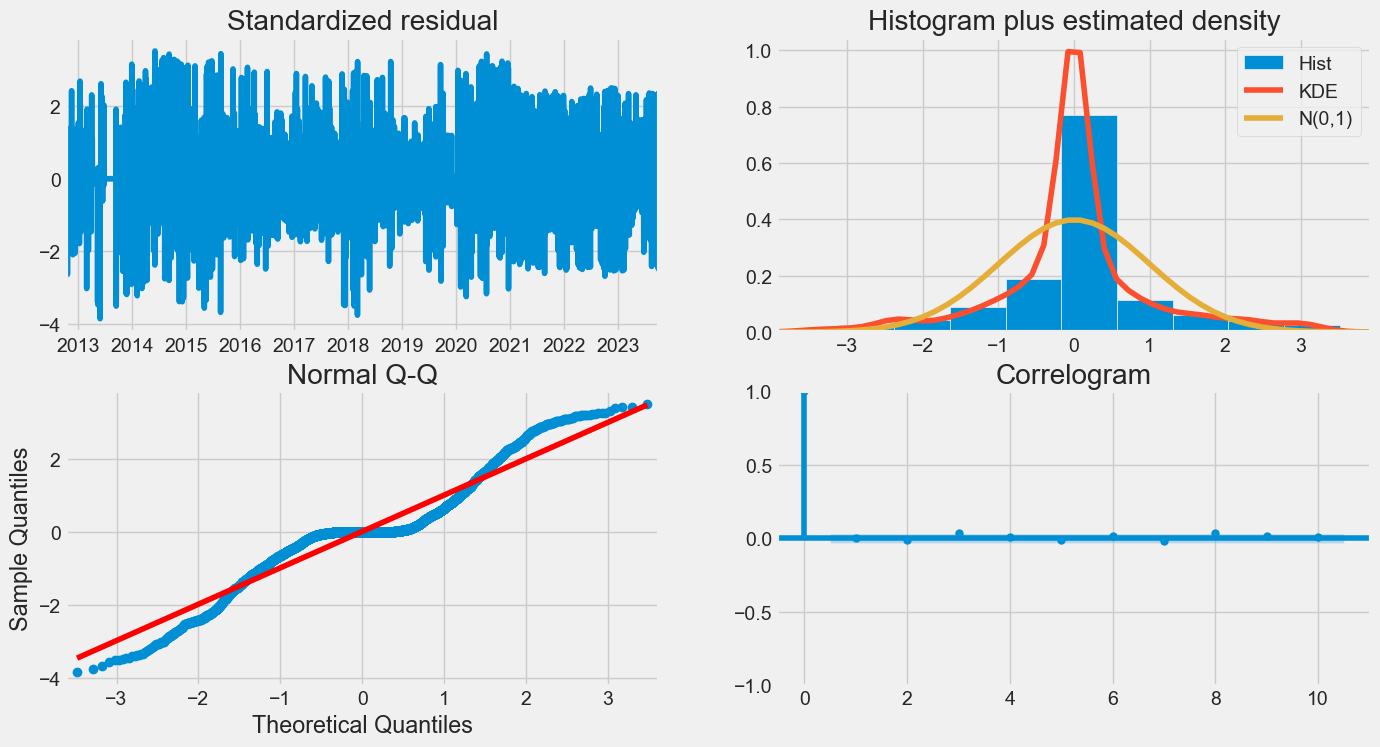

In [61]:
model = auto_arima(Stock_data_arima, start_p=0, start_q=0,
                   test='adf',
                   max_p=3, max_q=3,
                   m=1,
                   d=None,
                   seasonal=False,
                   start_P=0,
                   D=0,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

print(model.summary())

model.plot_diagnostics(figsize=(15, 8))
plt.show()

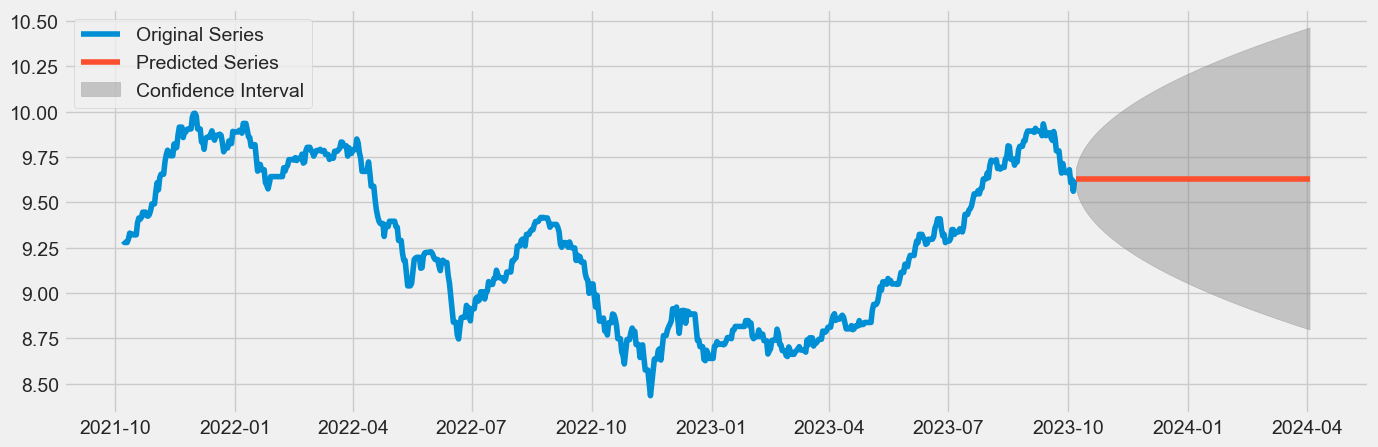

In [62]:
# Predict the next 180 days
forecast, confint = model.predict(n_periods=180, 
                                  alpha=0.05, 
                                  return_conf_int=True)

# Create a DataFrame for confidence intervals
cf = pd.DataFrame(confint, columns=['lower', 'upper'])

# Create a time index for the next 180 days
next_180_days_index = pd.date_range(start=Stock_data_arima.index[-1] 
                                    + pd.DateOffset(1), 
                                    periods=180)

# Create a Series for the prediction with the new time index
prediction_series = pd.Series(forecast, index=next_180_days_index)

# Plot the original series and the predicted series with confidence intervals
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(Stock_data_arima[-365*2:], label='Original Series')
ax.plot(prediction_series, label='Predicted Series')
ax.fill_between(prediction_series.index, 
                cf['lower'], cf['upper'], 
                color='grey', alpha=0.4, 
                label='Confidence Interval')
ax.legend(loc = 'upper left')
plt.show()


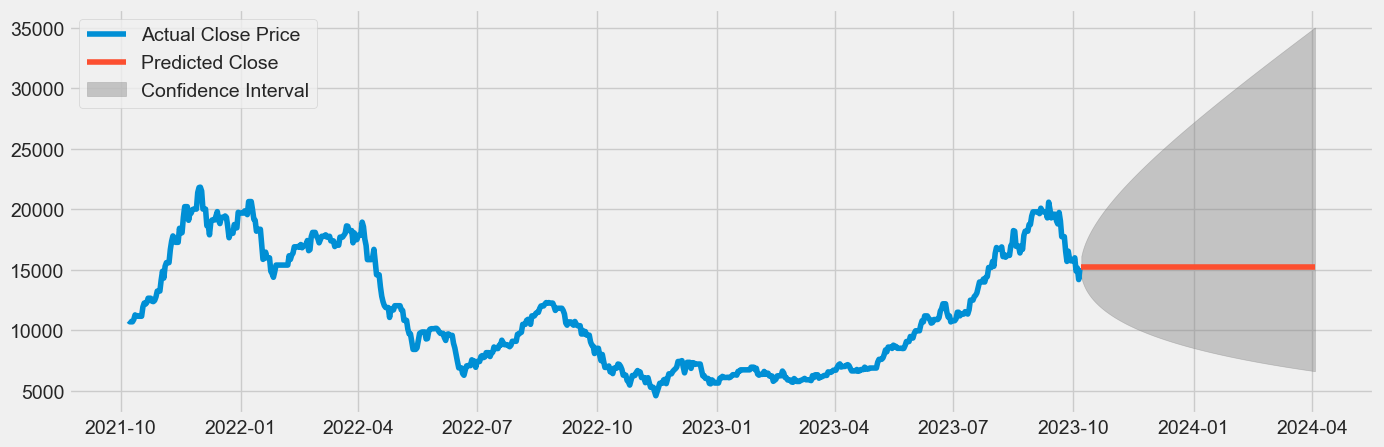

In [64]:
# Plot the Actual Close Price and the Predicted Close Price with confidence intervals
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(data.close[-365*2:], label='Actual Close Price')
ax.plot(next_180_days_index, 
        np.exp(prediction_series), 
        label='Predicted Close')
ax.fill_between(next_180_days_index, 
                np.exp(cf['lower']), np.exp(cf['upper']), 
                color='grey', alpha=0.4, 
                label='Confidence Interval')
ax.legend(loc = 'upper left')
plt.show()

In [65]:
returns =  100* data.close.pct_change().dropna()

Text(0.5, 1.0, 'VIX Returns')

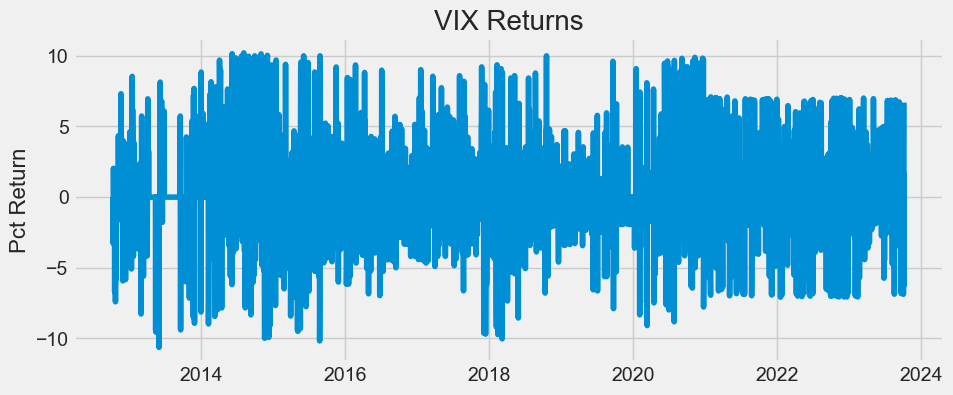

In [66]:

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('VIX Returns', fontsize=20)

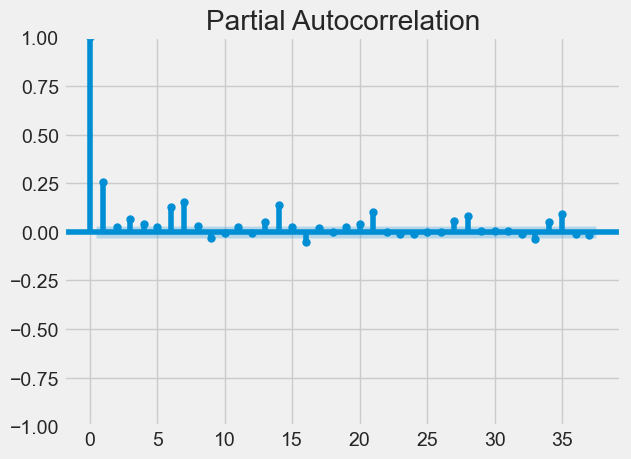

In [67]:
plot_pacf(returns**2)
plt.show()

In [68]:
from arch import arch_model
model = arch_model(returns, p=1, q=1)

In [69]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 16764.46425766694
Iteration:      2,   Func. Count:     14,   Neg. LLF: 11015.007996058745
Iteration:      3,   Func. Count:     22,   Neg. LLF: 16624.92858878635
Iteration:      4,   Func. Count:     30,   Neg. LLF: 10065.876391211135
Iteration:      5,   Func. Count:     38,   Neg. LLF: 9772.57720678611
Iteration:      6,   Func. Count:     43,   Neg. LLF: 9772.576823025971
Iteration:      7,   Func. Count:     48,   Neg. LLF: 9772.576196766711
Iteration:      8,   Func. Count:     53,   Neg. LLF: 9772.576144323604
Iteration:      9,   Func. Count:     58,   Neg. LLF: 9772.576141391844
Iteration:     10,   Func. Count:     62,   Neg. LLF: 9772.576141393834
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9772.576141391844
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10


In [70]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -9772.58
Distribution:                  Normal   AIC:                           19553.2
Method:            Maximum Likelihood   BIC:                           19578.3
                                        No. Observations:                 4014
Date:                Mon, Oct 09 2023   Df Residuals:                     4013
Time:                        12:57:15   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0842  4.203e-02      2.004  4.503e-02 [1.864e-03,  0.167]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2288      0.227      1.009      0.313   [ -0.216,  0.673]
alpha[1]       0.0602  2.809e-02      2.143  3.207e-02 [5.154e-03,  0.115]
beta[1]        0.9135  5.380e-02     16.980  1.150e-64   [  0.808,  1.019]
==========================================================================

Covariance estimator: robust
"""

In [71]:
rolling_predictions = []
test_size = 365*2

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [72]:
rolling_predictions = pd.Series(rolling_predictions, 
                                index=returns.index[-365*2:])

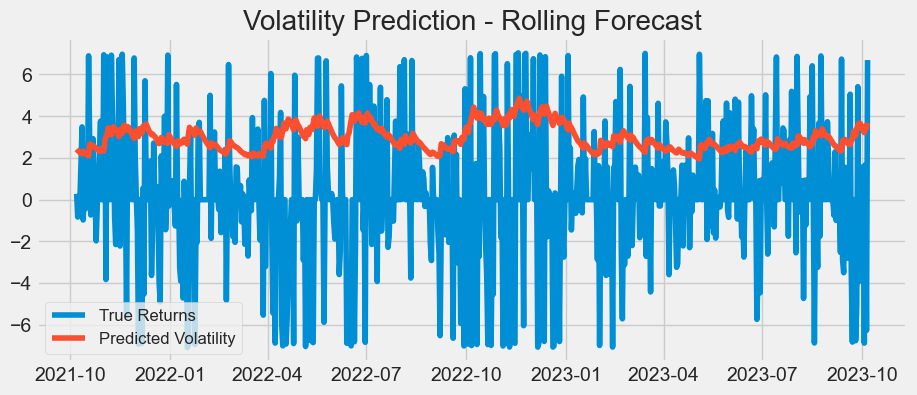

In [73]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*2:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'],
           loc = 'lower left', fontsize=12)

In [74]:
from datetime import timedelta

pred = model_fit.forecast(horizon=180)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,181)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 180 Days')

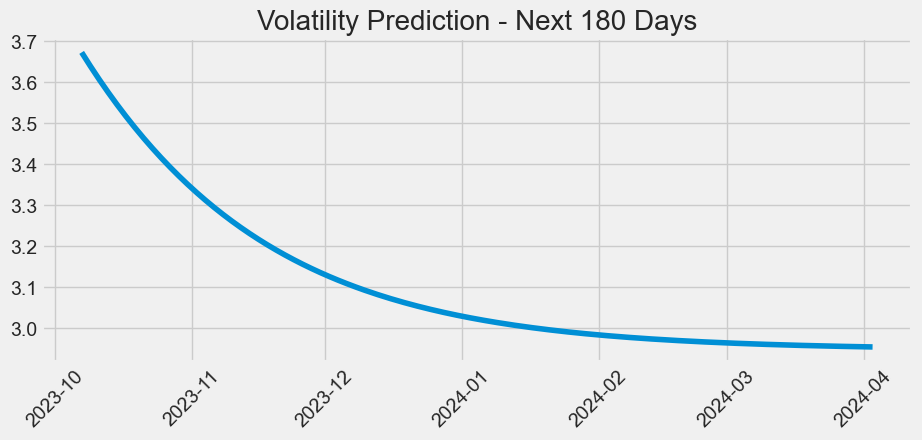

In [76]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.xticks(rotation = 45)
plt.title('Volatility Prediction - Next 180 Days', fontsize=20)